In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [7]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [8]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [9]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [10]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [11]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [12]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the results

In [13]:
def visualizeResults(df, data_scaled, model, team, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(model, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

function to view the average values in each cluster

In [14]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [15]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [16]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [17]:
def stagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('Stages of game in cluster {}'.format(cluster));
        ax=g.axes
        c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [18]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---

### Clustering by Player - K-Means Model


| **Anonymous 26** |
**Anonymous 29** |
**Anonymous 31** |

---
##### Clustering Red Team Victory

In [19]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 31")]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
120751,EUW1_6285408267,Red,anonymous 31,euw1,Viego,14.035800,6174.0,6357.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120756,EUW1_6285408267,Red,anonymous 31,euw1,Viego,16.787650,4776.0,8202.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120759,EUW1_6285408267,Red,anonymous 31,euw1,Viego,18.328417,9965.0,6829.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120785,EUW1_6285342021,Red,anonymous 31,euw1,Talon,3.013517,13550.0,1630.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120799,EUW1_6285342021,Red,anonymous 31,euw1,Talon,9.772783,11884.0,2238.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266306,EUW1_6288978001,Red,anonymous 31,euw1,LeeSin,15.950667,9602.0,6271.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266313,EUW1_6288978001,Red,anonymous 31,euw1,LeeSin,18.460017,10122.0,2422.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266315,EUW1_6288978001,Red,anonymous 31,euw1,LeeSin,19.563650,7613.0,5009.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266318,EUW1_6288978001,Red,anonymous 31,euw1,LeeSin,21.458783,8412.0,6910.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [20]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideVictory_df["gameId"]))))

Anonymous 26 played 26 matches


In [21]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 26 matches in which the jungler died at least once
1 players died a total of 155 times on the red side
Victory games on red side contains an average of 5.961538461538462 deaths per game


In [22]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
120751,6174.0,6357.0,14.035800
120756,4776.0,8202.0,16.787650
120759,9965.0,6829.0,18.328417
120785,13550.0,1630.0,3.013517
120799,11884.0,2238.0,9.772783
...,...,...,...
266306,9602.0,6271.0,15.950667
266313,10122.0,2422.0,18.460017
266315,7613.0,5009.0,19.563650
266318,8412.0,6910.0,21.458783


Normalize Data:

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[-2.92913698e-01,  7.54780395e-02, -3.99984841e-01],
       [-7.45009010e-01,  6.65114785e-01, -5.86637464e-02],
       [ 9.33047194e-01,  2.26322779e-01,  1.32442660e-01],
       [ 2.09239032e+00, -1.43520646e+00, -1.76711525e+00],
       [ 1.55362724e+00, -1.24089798e+00, -9.28740956e-01],
       [ 3.22492152e-01, -8.32466673e-01, -7.28838519e-01],
       [-1.71966883e-01,  6.34434499e-01, -3.25265101e-01],
       [ 5.01325276e-01, -6.66601377e-01,  2.36295760e-01],
       [-1.50949636e+00,  3.57992339e-01,  3.94293539e-01],
       [-6.27942842e-01, -1.08014607e+00,  7.51325520e-01],
       [-1.02667926e+00,  5.40476124e-01,  9.56534516e-01],
       [ 1.16171116e-01,  3.23338874e-02,  1.30809249e+00],
       [-2.06960300e+00, -1.37895927e+00,  1.57017077e+00],
       [ 7.91080211e-01, -1.58956665e+00, -7.57498485e-01],
       [ 2.66220692e-03, -1.69726723e+00, -3.05363955e-01],
       [ 5.53067229e-01, -1.19168169e+00,  2.14172350e-01],
       [ 3.23138926e-01, -6.22178880e-01

In [25]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2909231031257548
Silhouette score for k=3: 0.27943542010176164
Silhouette score for k=4: 0.2885315544285076
Silhouette score for k=5: 0.2564792948736615
Silhouette score for k=6: 0.26172576472829506
Silhouette score for k=7: 0.28042222767597985
Silhouette score for k=8: 0.2782587929444964
Silhouette score for k=9: 0.29088210528345104
Silhouette score for k=10: 0.2744569523625303
Silhouette score for k=11: 0.2802198029643662
Silhouette score for k=12: 0.2832696642167102
Silhouette score for k=13: 0.28925093950881225
Silhouette score for k=14: 0.289746779079088
Silhouette score for k=15: 0.2943670824993662
Silhouette score for k=16: 0.30311650528198913
Silhouette score for k=17: 0.28738849589816956
Silhouette score for k=18: 0.29078552061462726
Silhouette score for k=19: 0.30615633146685906
Silhouette score for k=20: 0.30010162896917125
Silhouette score for k=25: 0.3046036420867789


K-Means with k = 19

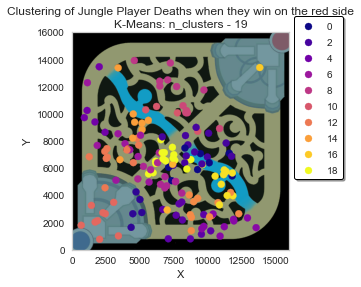

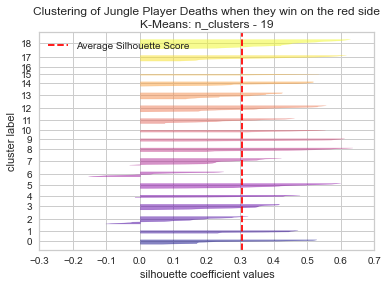

Silhouette score: 0.30615633146685906
18    16
2     13
7     12
13    11
12    11
3     10
17    10
5      9
6      9
11     9
14     8
0      8
8      7
1      5
9      5
4      5
10     4
15     2
16     1
Name: cluster, dtype: int64

Inertia: 55.44502930697191

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9363.000000,6321.375000,4.946579
1,1,4737.000000,3001.800000,20.138010
2,2,9115.153846,7434.692308,21.622979
3,3,8365.500000,2135.100000,13.512390
4,4,1630.400000,10300.800000,13.169067
5,5,11334.444444,1884.222222,6.873181
6,6,3707.111111,7676.000000,30.137306
7,7,6589.833333,5373.083333,20.139969
8,8,7028.285714,12629.714286,19.762288
9,9,8866.200000,9988.800000,9.707457


In [26]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=19, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [27]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1644.321289,798.041812,1.406045
1,1,298.770815,903.678571,2.581385
2,2,1377.439534,900.805997,3.511392
3,3,1094.248532,979.213914,2.004796
4,4,562.081346,1667.375351,2.143203
5,5,1290.746564,467.610897,2.413187
6,6,1401.279371,2034.467061,4.106685
7,7,920.416195,825.980776,2.863343
8,8,1428.436479,799.279625,2.540024
9,9,1001.818826,565.864790,2.936405


In [28]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11785.0,7111.0,7489.0,5088.0,7.031833,2.902150
1,1,5138.0,4354.0,4259.0,1652.0,23.318067,16.079533
2,2,11739.0,6643.0,9009.0,6222.0,27.806917,17.149500
3,3,10206.0,6677.0,3516.0,804.0,16.010033,9.872000
4,4,2434.0,909.0,13469.0,8648.0,15.604383,10.072083
5,5,13550.0,9554.0,2637.0,1007.0,11.026183,3.013517
6,6,5675.0,1137.0,12298.0,4982.0,37.417500,24.972533
7,7,8079.0,4848.0,7141.0,4174.0,24.350117,15.691483
8,8,9709.0,4589.0,13929.0,11761.0,22.899283,15.315733
9,9,10858.0,8172.0,10606.0,8923.0,13.926617,4.929433


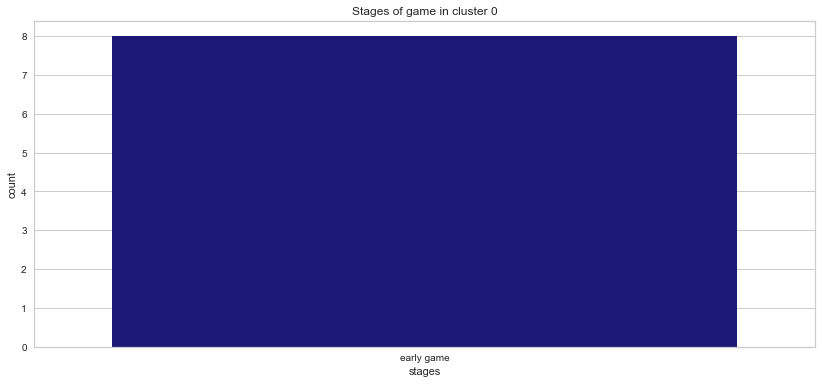

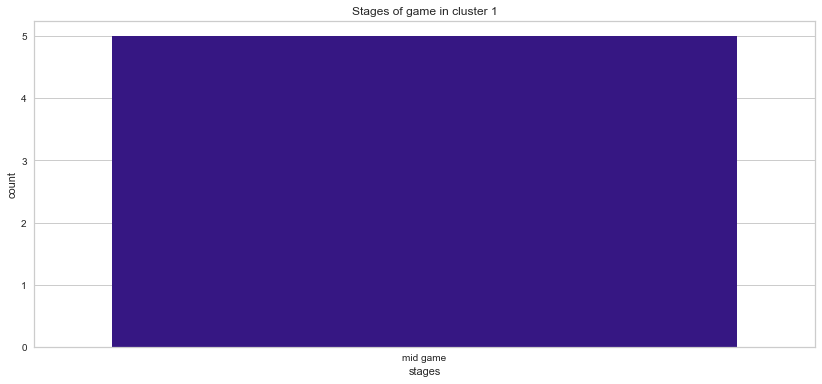

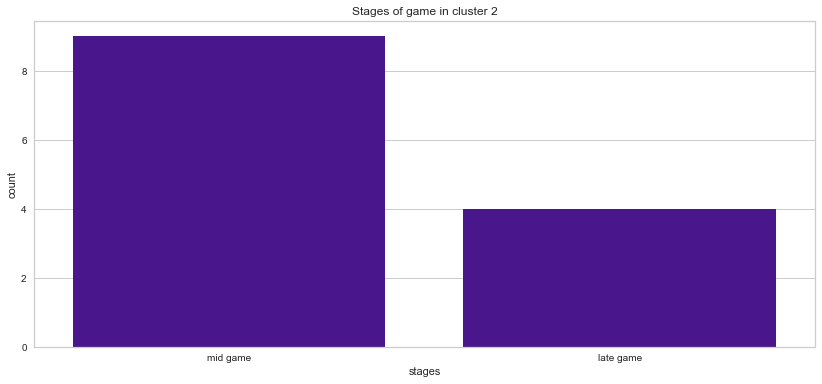

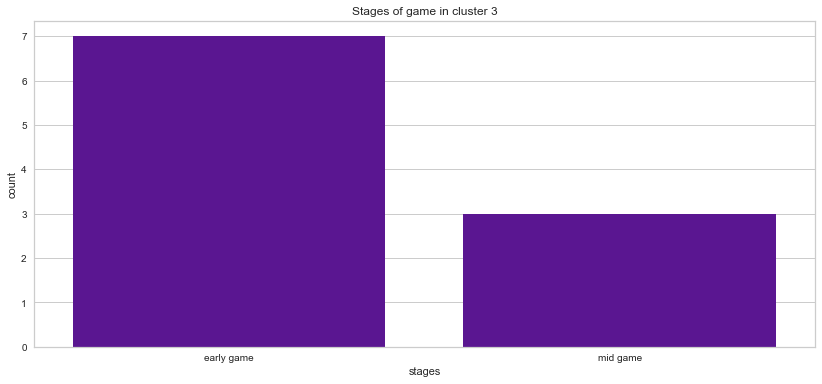

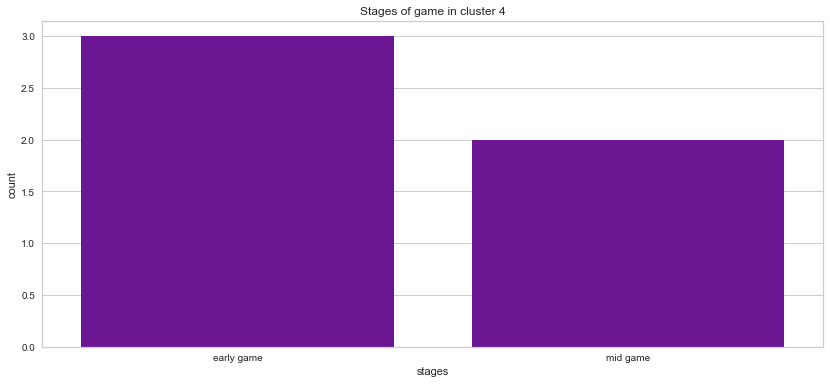

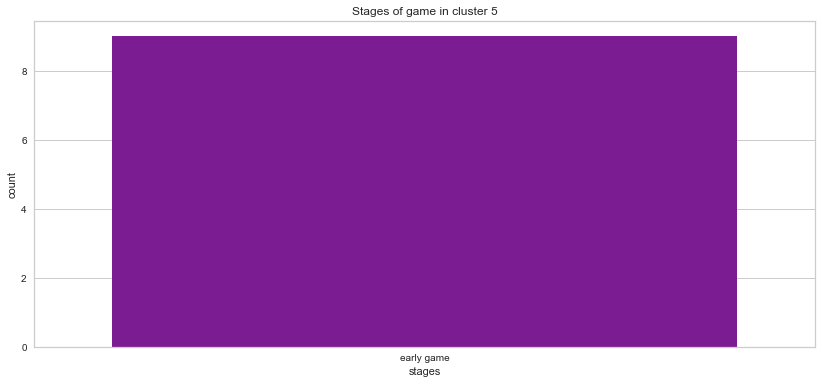

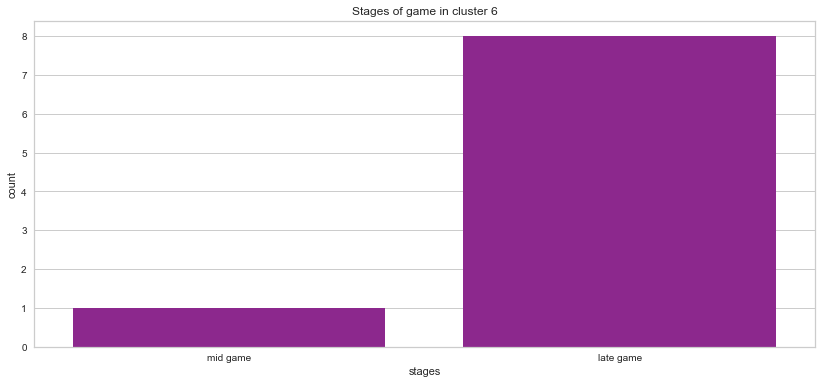

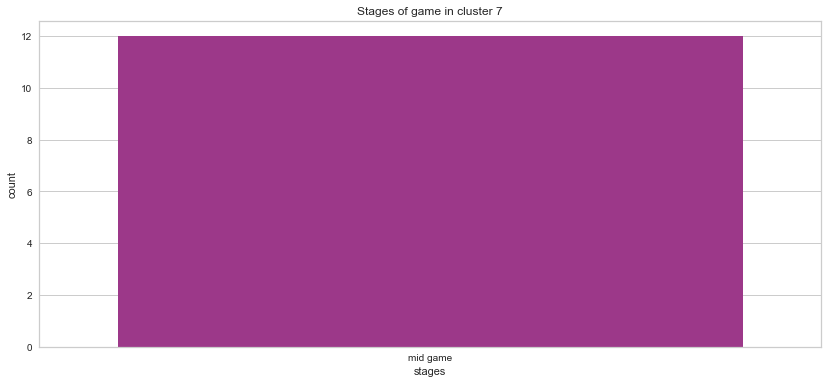

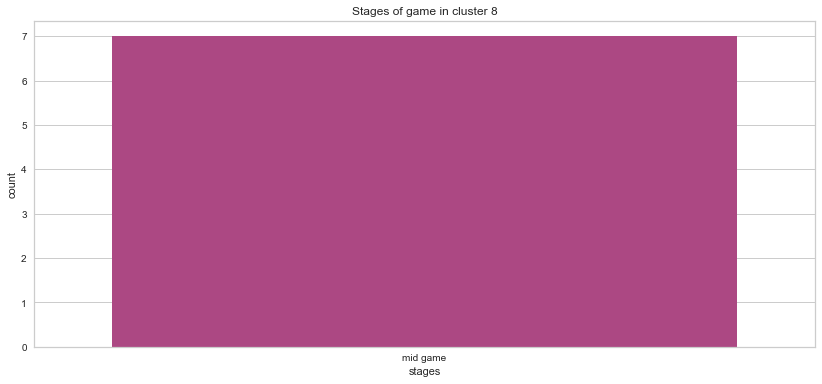

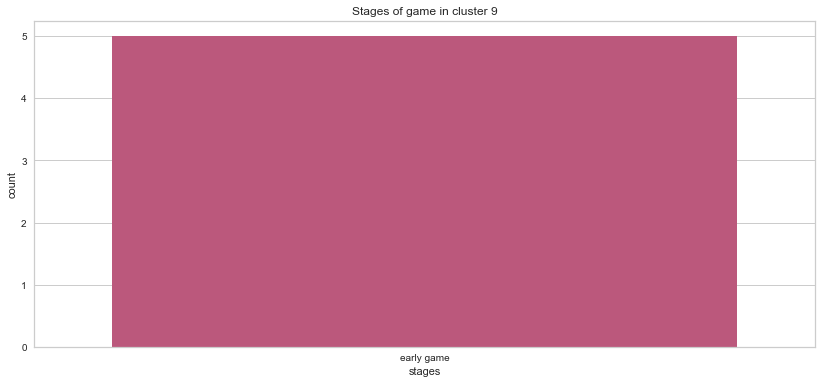

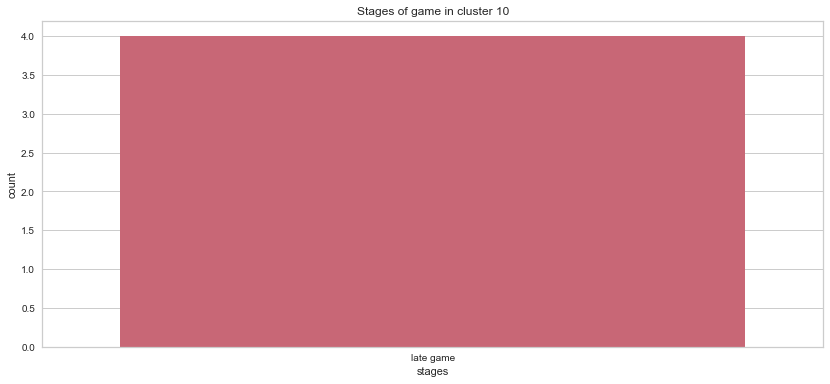

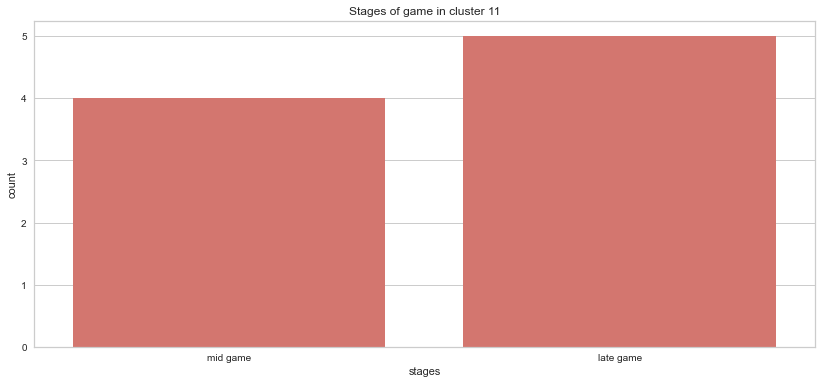

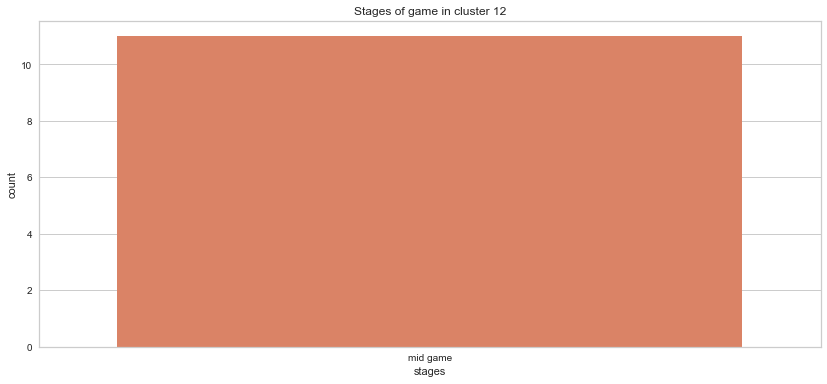

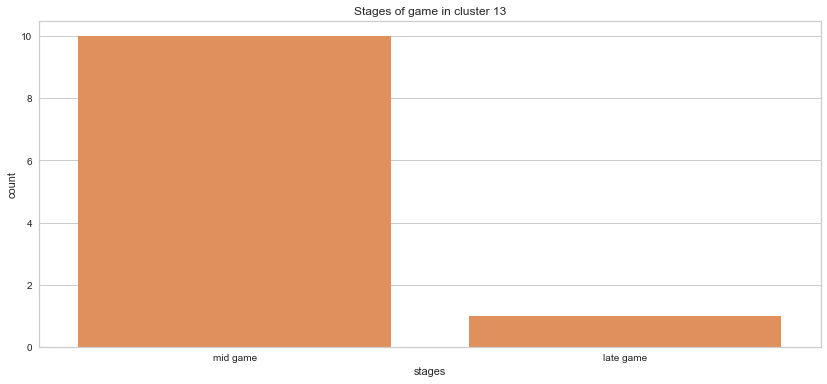

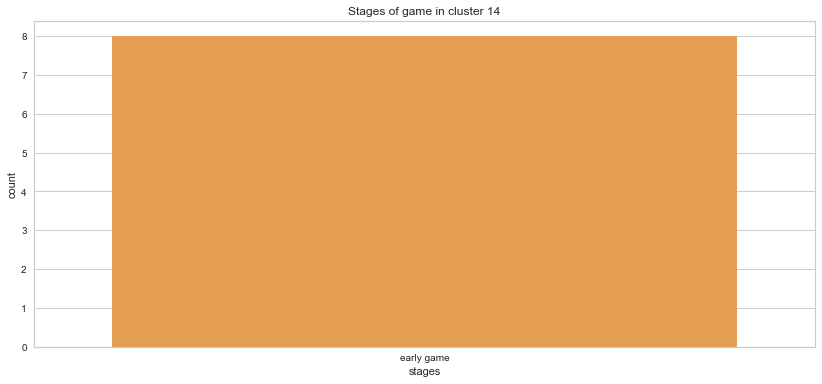

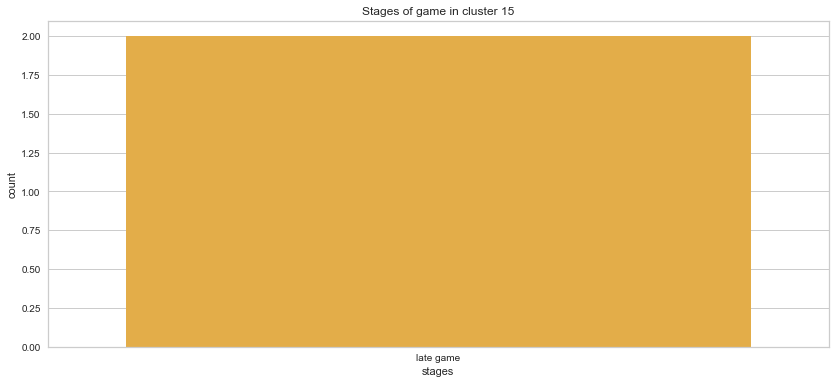

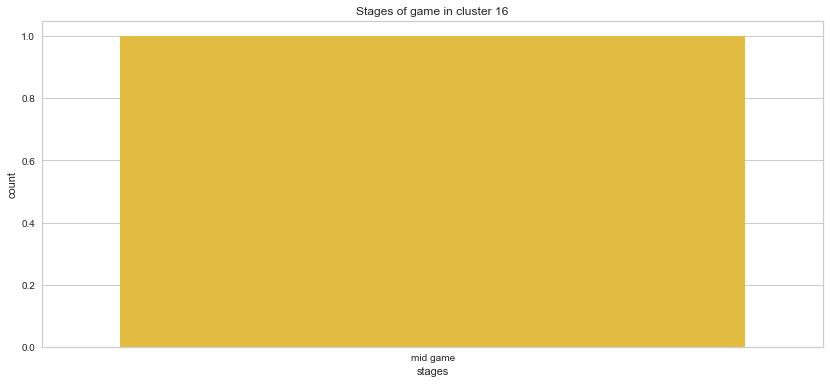

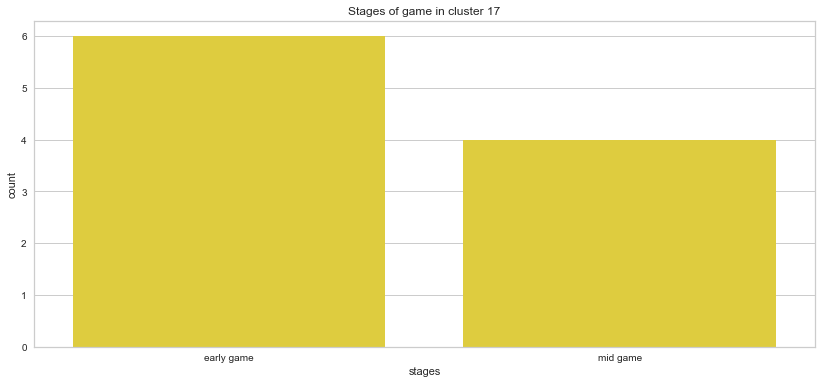

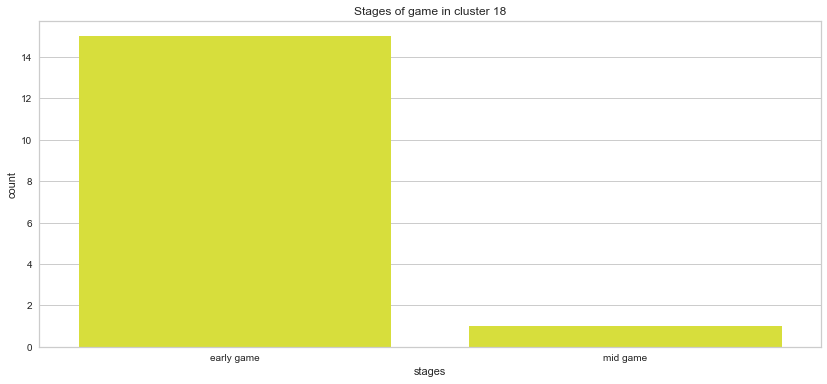

In [29]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 9

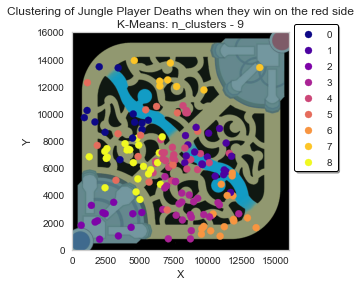

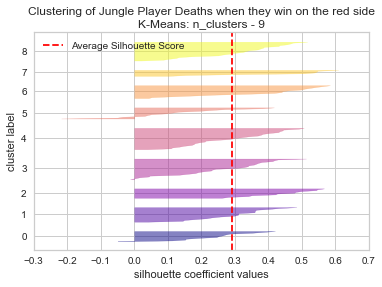

Silhouette score: 0.29088210528345104
4    26
3    25
8    23
1    18
6    16
5    14
0    13
2    12
7     8
Name: cluster, dtype: int64

Inertia: 106.26624108408075

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3429.846154,9755.307692,8.718658
1,1,10044.111111,6895.277778,19.400829
2,2,2741.833333,2248.666667,25.091844
3,3,8610.800000,3192.120000,17.878675
4,4,7849.000000,7208.230769,9.853690
5,5,5408.428571,7786.500000,32.471071
6,6,11223.312500,2711.812500,8.535589
7,7,7877.000000,12727.625000,20.223785
8,8,4409.956522,6494.434783,19.809505


In [30]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [31]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1572.421692,1796.409898,4.258058
1,1,1191.861144,1288.648638,3.837198
2,2,1307.483450,799.680179,4.716209
3,3,1402.010842,1212.453523,3.788939
4,4,1294.345305,1436.823535,3.760710
5,5,2264.170069,2471.675075,4.169015
6,6,1122.186856,1502.212669,3.187893
7,7,2612.965461,791.263221,2.671351
8,8,1484.281395,1254.437925,3.219059


In [32]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,5618.0,909.0,13469.0,6632.0,15.604383,2.868200
1,1,11739.0,8298.0,9009.0,4222.0,25.555717,13.926617
2,2,5138.0,680.0,3491.0,774.0,36.952900,18.941617
3,3,12270.0,6677.0,5384.0,804.0,26.020233,9.872000
4,4,11574.0,5971.0,10606.0,5088.0,15.030650,2.902150
5,5,9254.0,1137.0,12298.0,2931.0,40.960933,26.896850
6,6,13550.0,9526.0,5655.0,1007.0,13.715367,3.013517
7,7,13818.0,4589.0,13929.0,11761.0,23.454267,15.315733
8,8,6643.0,1270.0,8313.0,3703.0,25.421300,14.813900


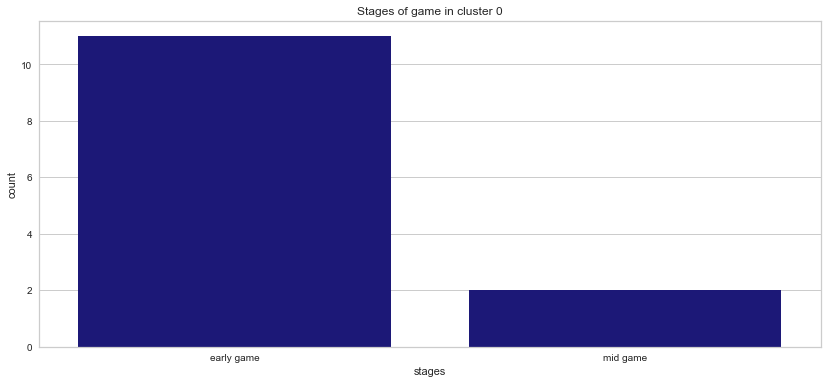

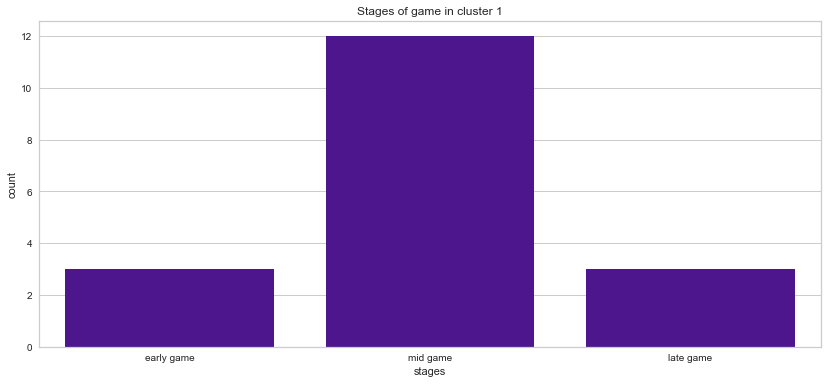

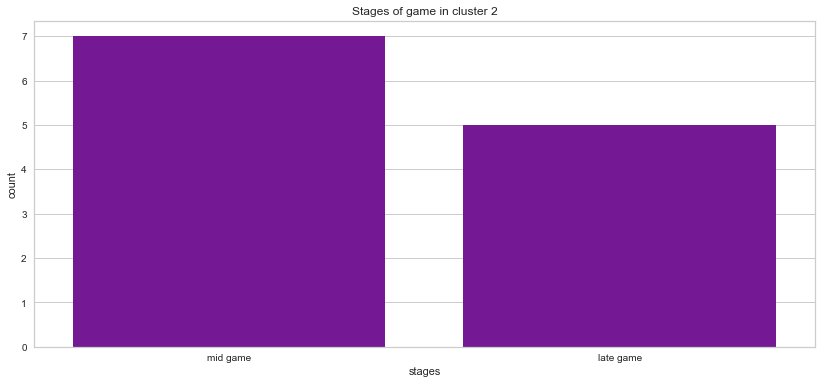

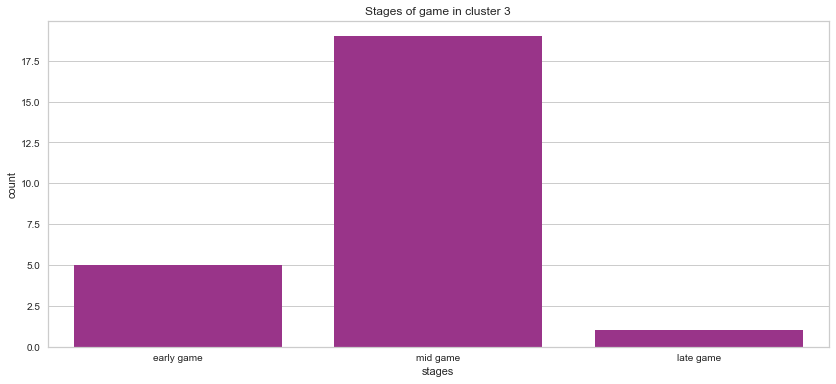

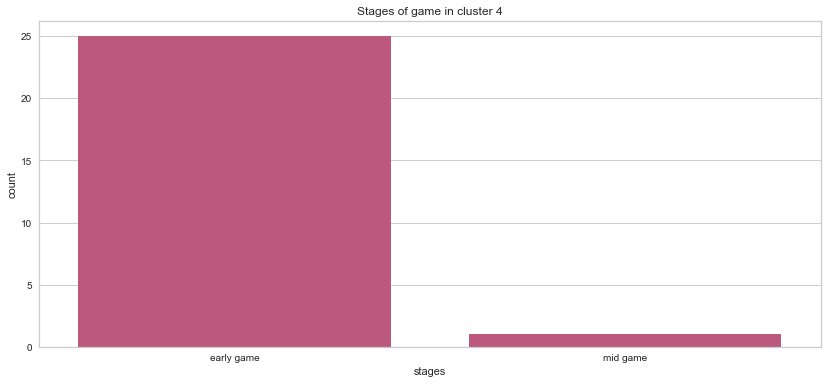

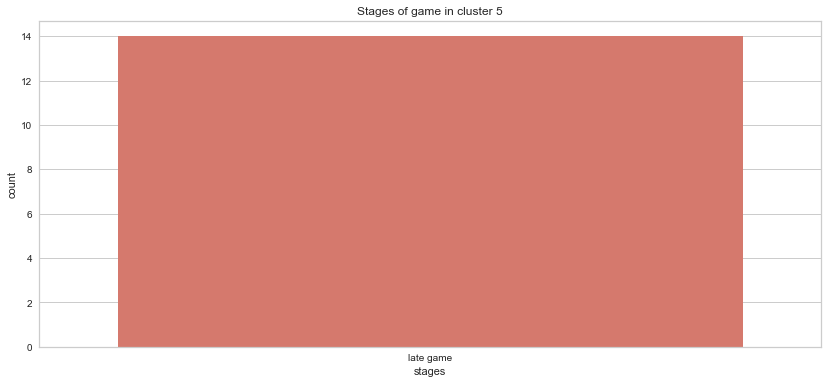

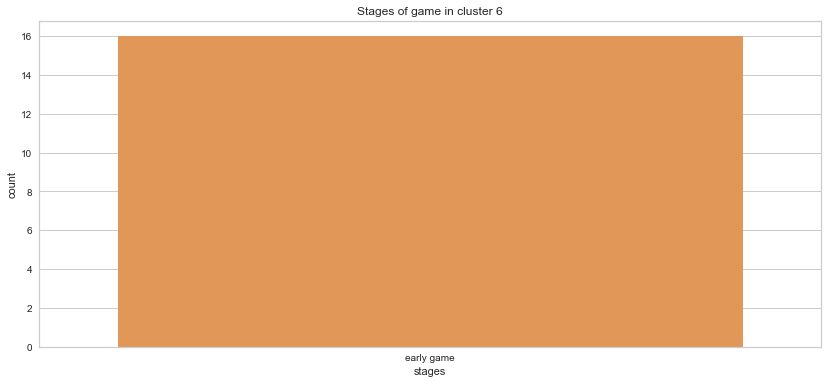

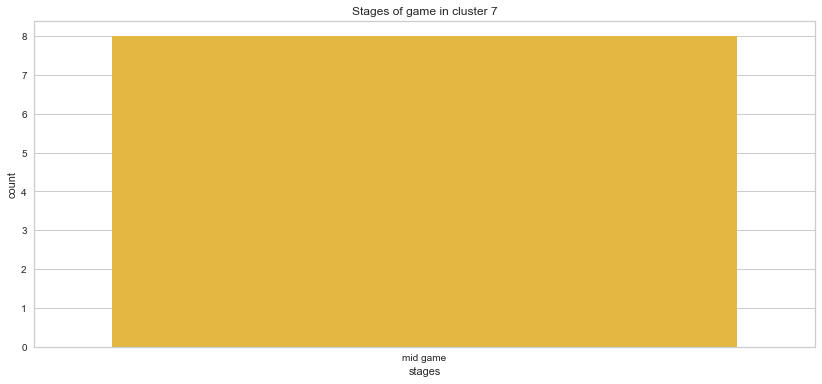

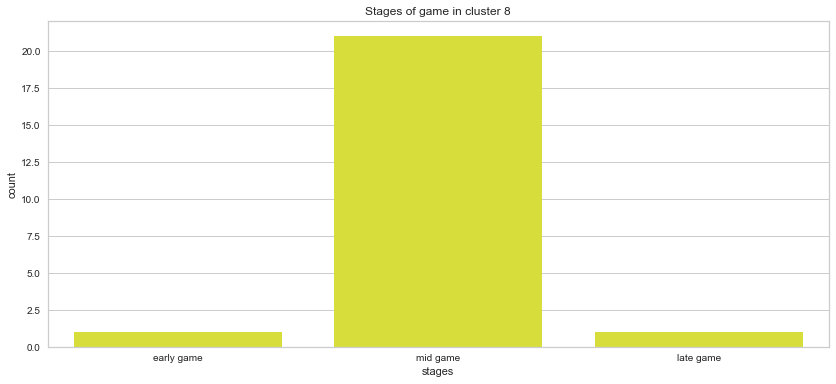

In [33]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [34]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 31")]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
9298,EUW1_6271342497,Red,anonymous 31,euw1,Sejuani,10.144483,12143.0,4850.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
75251,EUW1_6277052764,Red,anonymous 31,euw1,Viego,11.000633,913.0,11407.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
75256,EUW1_6277052764,Red,anonymous 31,euw1,Viego,12.599233,11343.0,1916.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
75258,EUW1_6277052764,Red,anonymous 31,euw1,Viego,13.753883,10481.0,1291.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
75266,EUW1_6277052764,Red,anonymous 31,euw1,Viego,16.809617,3745.0,10908.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266400,EUW1_6288914236,Red,anonymous 31,euw1,Sylas,27.781833,5917.0,5913.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266405,EUW1_6288914236,Red,anonymous 31,euw1,Sylas,29.464233,3161.0,2415.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266407,EUW1_6288914236,Red,anonymous 31,euw1,Sylas,30.471200,10897.0,11198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266411,EUW1_6288914236,Red,anonymous 31,euw1,Sylas,32.498617,7491.0,2693.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [35]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideDefeat_df["gameId"]))))

Anonymous 26 played 16 matches


In [36]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 16 matches in which the jungler died at least once
1 players died a total of 117 times on the red side
Defeat games on red side contains an average of 7.3125 deaths per game


In [37]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
9298,12143.0,4850.0,10.144483
75251,913.0,11407.0,11.000633
75256,11343.0,1916.0,12.599233
75258,10481.0,1291.0,13.753883
75266,3745.0,10908.0,16.809617
...,...,...,...
266400,5917.0,5913.0,27.781833
266405,3161.0,2415.0,29.464233
266407,10897.0,11198.0,30.471200
266411,7491.0,2693.0,32.498617


Normalize Data:

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[ 1.20727805, -0.46999999, -0.7956695 ],
       [-2.22422768,  1.45372433, -0.69450522],
       [ 0.96282528, -1.33079107, -0.50561166],
       [ 0.69942742, -1.51415659, -0.36917607],
       [-1.35886488,  1.3073253 , -0.00810493],
       [ 1.08932959,  0.07334871,  0.13082782],
       [-0.1674632 , -1.64764669,  1.34971864],
       [-1.44564562, -0.47117353,  1.76699938],
       [ 0.75106807, -0.92298616,  2.01071413],
       [ 0.722956  ,  1.83277753,  2.22677703],
       [ 0.88704492, -0.23646566, -1.58042575],
       [ 0.35505459, -1.51943752,  0.06785346],
       [-0.43544455, -0.04576553,  0.36185199],
       [-0.33980241,  0.00528343,  0.52984074],
       [-0.97079611,  0.56887569,  0.88182917],
       [ 0.86351635,  0.54452475,  1.19519443],
       [-0.35324731,  0.73757196, -1.64622025],
       [-0.34835825,  0.03755577, -0.41923534],
       [ 0.69545507, -0.85726796,  0.75026578],
       [-0.07976577,  1.12102593, -1.49148532],
       [-1.78054591,  0.35411799, -1.038

In [39]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.29054975063871374
Silhouette score for k=3: 0.30741065313542554
Silhouette score for k=4: 0.32773094576453626
Silhouette score for k=5: 0.3076888085861629
Silhouette score for k=6: 0.3027382371936619
Silhouette score for k=7: 0.298330675537702
Silhouette score for k=8: 0.30054927994944197
Silhouette score for k=9: 0.27465120871685406
Silhouette score for k=10: 0.2825165971468087
Silhouette score for k=11: 0.28098991393607564
Silhouette score for k=12: 0.262248207090696
Silhouette score for k=13: 0.2747096238813654
Silhouette score for k=14: 0.26901485757895455
Silhouette score for k=15: 0.2668678099743291
Silhouette score for k=16: 0.2657521620664565
Silhouette score for k=17: 0.27605643998884516
Silhouette score for k=18: 0.2566717917815937
Silhouette score for k=19: 0.2802534789043072
Silhouette score for k=20: 0.28921187476720955
Silhouette score for k=25: 0.299236457418558


K-Means with k = 4

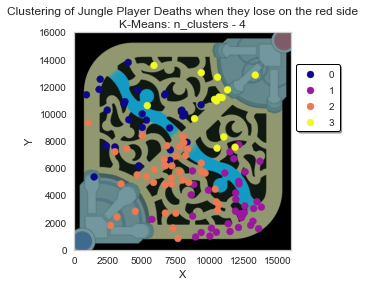

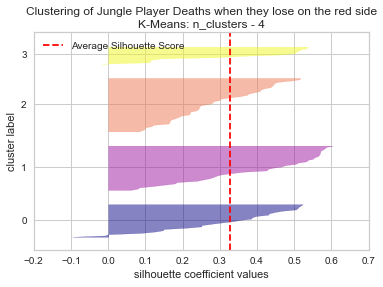

Silhouette score: 0.32773094576453626
2    42
1    35
0    26
3    14
Name: cluster, dtype: int64

Inertia: 137.24595855855614

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5021.115385,9714.884615,10.576059
1,1,11337.057143,3459.485714,10.856313
2,2,6920.023810,5457.642857,22.809004
3,3,10034.428571,10856.642857,25.844552


In [40]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [41]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2381.033669,2021.134893,5.669071
1,1,1814.357611,1888.420192,5.682764
2,2,2225.725590,2034.648488,5.188404
3,3,2058.069300,1908.872240,5.199850


In [42]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9349.0,913.0,13786.0,5363.0,21.630617,1.714017
1,1,13785.0,5729.0,7735.0,946.0,22.657517,2.736583
2,2,10650.0,1036.0,9368.0,836.0,34.524150,14.480600
3,3,13339.0,5394.0,13566.0,7477.0,35.723350,17.222783


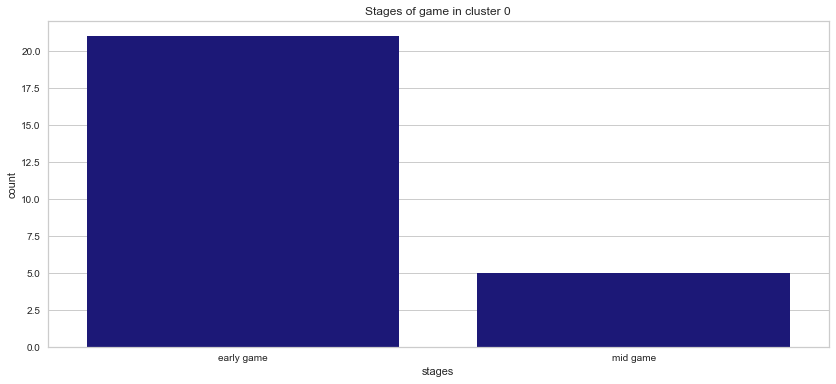

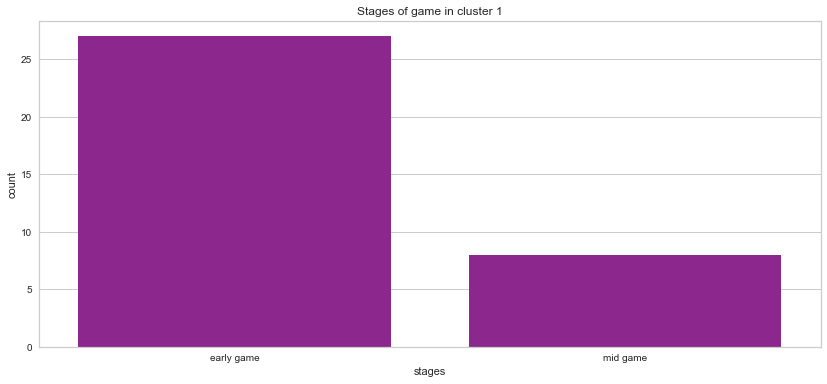

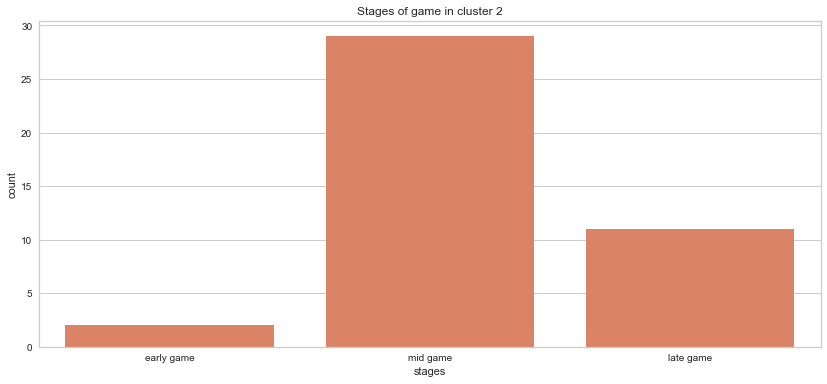

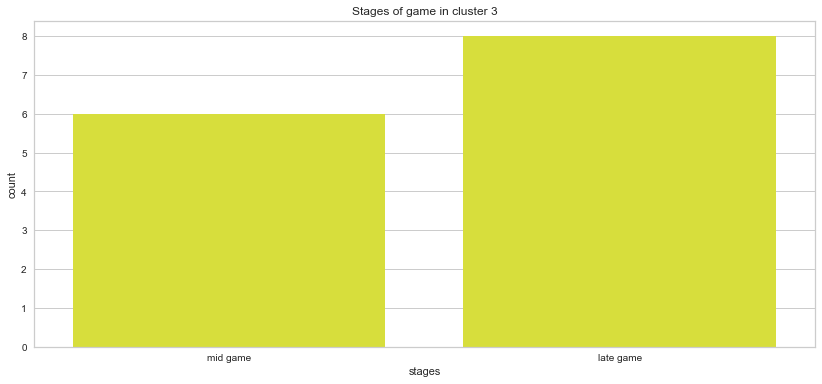

In [43]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 5

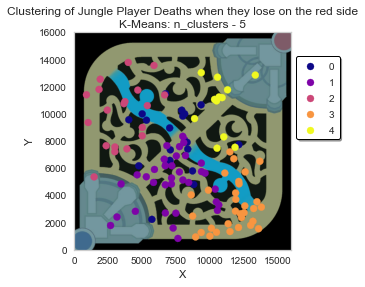

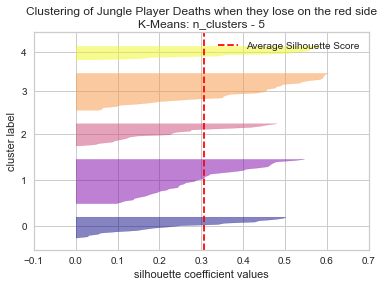

Silhouette score: 0.3076888085861629
1    37
3    31
2    19
0    18
4    12
Name: cluster, dtype: int64

Inertia: 118.37728828319138

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7363.111111,8130.888889,6.843978
1,1,7279.189189,5119.135135,22.824145
2,2,3472.789474,10042.473684,17.211781
3,3,11658.548387,3241.774194,11.738805
4,4,10767.083333,10651.416667,26.344888


In [46]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [47]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1895.452713,2304.578701,4.395393
1,1,1934.163872,1909.798124,5.206402
2,2,1634.460110,2257.922016,6.232241
3,3,1466.789138,1762.172646,5.438146
4,4,1083.580366,1895.306548,5.458246


In [48]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,12125.0,4030.0,11480.0,2240.0,14.810300,1.714017
1,1,10650.0,2688.0,8350.0,836.0,34.524150,14.480600
2,2,6664.0,913.0,13786.0,5363.0,29.929333,7.993633
3,3,13785.0,8623.0,7204.0,946.0,22.657517,2.736583
4,4,13339.0,8867.0,13034.0,7477.0,35.723350,17.222783


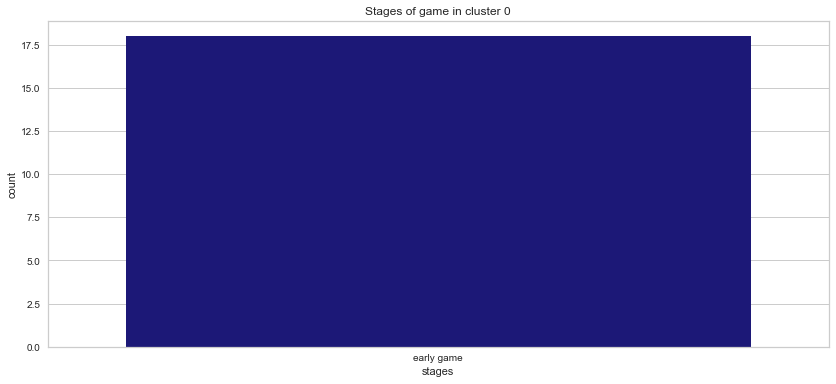

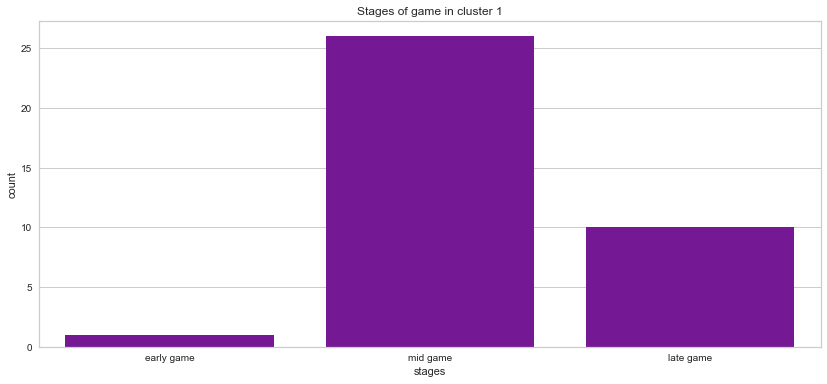

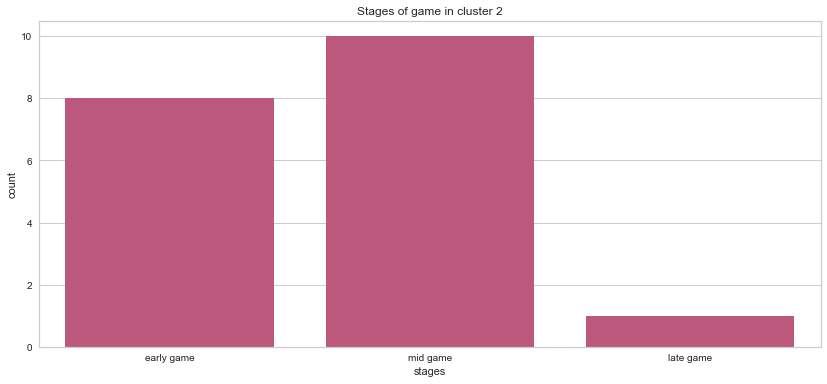

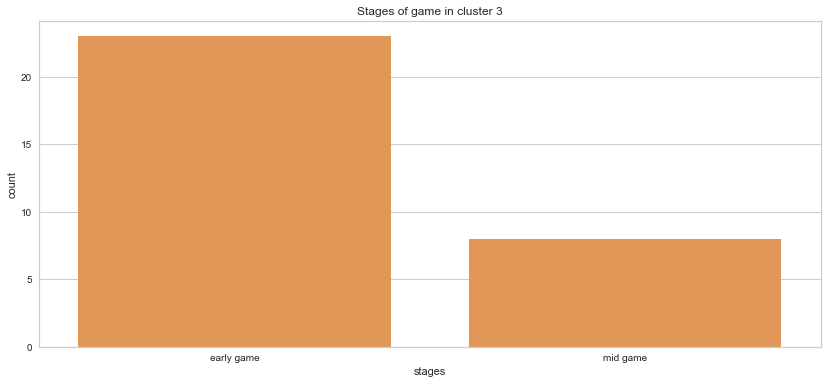

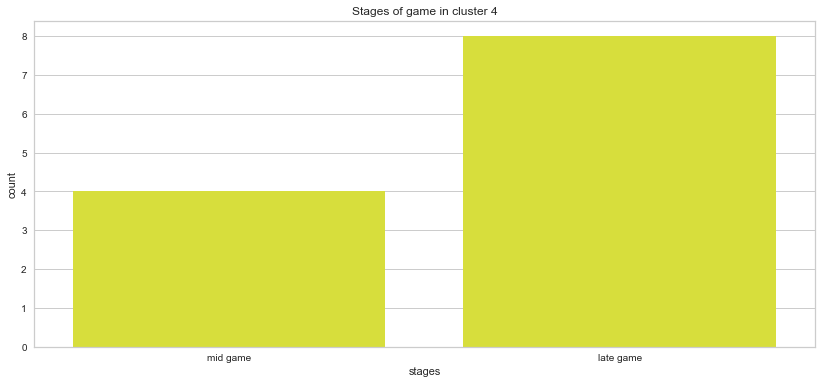

In [49]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [50]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 31")]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
121392,EUW1_6283843437,Blue,anonymous 31,euw1,Viego,2.142467,13008.0,1806.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
121408,EUW1_6283843437,Blue,anonymous 31,euw1,Viego,10.869917,11854.0,5372.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
121414,EUW1_6283843437,Blue,anonymous 31,euw1,Viego,12.659233,10500.0,4837.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
121416,EUW1_6283843437,Blue,anonymous 31,euw1,Viego,13.753600,7610.0,4722.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
121649,EUW1_6280740544,Blue,anonymous 31,euw1,LeeSin,4.900183,8742.0,8359.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266243,EUW1_6289012600,Blue,anonymous 31,euw1,Gragas,13.832517,7384.0,7983.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266251,EUW1_6289012600,Blue,anonymous 31,euw1,Gragas,17.130067,13281.0,6361.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266254,EUW1_6289012600,Blue,anonymous 31,euw1,Gragas,18.664817,8304.0,7306.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266259,EUW1_6289012600,Blue,anonymous 31,euw1,Gragas,20.877667,9364.0,9346.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [51]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideVictory_df["gameId"]))))

Anonymous 26 played 9 matches


In [52]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 9 matches in which the jungler died at least once
1 players died a total of 66 times on the blue side
Victory games on blue side contains an average of 7.333333333333333 deaths per game


In [53]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
121392,13008.0,1806.0,2.142467
121408,11854.0,5372.0,10.869917
121414,10500.0,4837.0,12.659233
121416,7610.0,4722.0,13.753600
121649,8742.0,8359.0,4.900183
...,...,...,...
266243,7384.0,7983.0,13.832517
266251,13281.0,6361.0,17.130067
266254,8304.0,7306.0,18.664817
266259,9364.0,9346.0,20.877667


Normalize Data:

In [54]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[ 1.37869502, -1.90916134, -1.55968726],
       [ 1.00293083, -0.71885745, -0.46432493],
       [ 0.56204286, -0.89743641, -0.23975188],
       [-0.37899571, -0.93582254, -0.10240042],
       [-0.01039514,  0.27818061, -1.21357254],
       [ 1.64993555,  0.07122929,  0.47667546],
       [-1.13117533,  0.89369389,  0.77731874],
       [-0.52422173,  2.05862955,  1.03934957],
       [ 0.27517262, -0.61805213,  1.24590808],
       [ 0.1006409 , -0.52792817, -0.96556929],
       [-0.31191822,  0.33926463, -0.79121397],
       [ 0.76197285, -0.45449383, -0.27406987],
       [-0.21781436,  0.83961951, -0.03434386],
       [ 0.04268074,  0.21876555, -1.54179196],
       [ 1.49363849, -1.55534134, -1.3851395 ],
       [-1.08168126,  0.40201761, -1.18495678],
       [-0.36076105, -0.85437719, -0.94968001],
       [-2.23990763,  1.60467182, -0.79650412],
       [ 0.73299277, -0.12637585, -0.66305385],
       [ 0.30512956, -0.46350622, -0.36488098],
       [ 1.5405276 , -1.74426787, -0.202

In [57]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 40]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3014633247092174
Silhouette score for k=3: 0.30456887681813205
Silhouette score for k=4: 0.2969291420136387
Silhouette score for k=5: 0.28608933443925805
Silhouette score for k=6: 0.2990240056902334
Silhouette score for k=7: 0.25947688015910286
Silhouette score for k=8: 0.2874521402834939
Silhouette score for k=9: 0.2770532304281591
Silhouette score for k=10: 0.2729648252309019
Silhouette score for k=11: 0.2885954416411347
Silhouette score for k=12: 0.2958308355204125
Silhouette score for k=13: 0.3060926064384451
Silhouette score for k=14: 0.31536591489003285
Silhouette score for k=15: 0.31912309347797196
Silhouette score for k=16: 0.3450970417202114
Silhouette score for k=17: 0.31867965785620733
Silhouette score for k=18: 0.3203966119224503
Silhouette score for k=19: 0.3424321815704853
Silhouette score for k=20: 0.34025106881138345
Silhouette score for k=25: 0.36642289004235856
Silhouette score for k=40: 0.3346220817280432


K-Means with k = 16

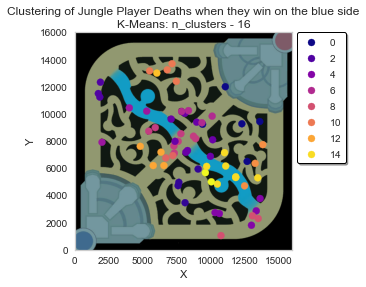

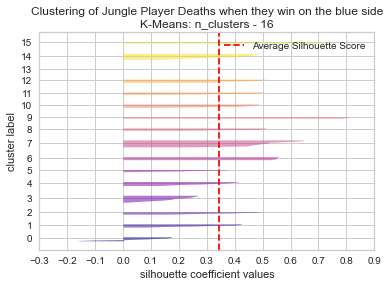

Silhouette score: 0.3450970417202114
7     8
3     8
14    7
4     5
0     5
1     4
10    4
12    4
6     4
11    3
5     3
2     3
8     3
15    2
9     2
13    1
Name: cluster, dtype: int64

Inertia: 18.298219300093795

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11822.600000,9292.000000,29.252263
1,1,8120.500000,4774.750000,9.727087
2,2,1829.000000,11691.000000,8.844144
3,3,8523.500000,8311.250000,14.676137
4,4,12198.600000,2770.600000,4.841457
5,5,3777.666667,9521.333333,20.644800
6,6,8930.500000,9902.250000,21.390737
7,7,7387.875000,8193.625000,4.523487
8,8,12450.333333,1949.666667,11.955450
9,9,6966.000000,6847.000000,27.807283


In [56]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [58]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1453.514857,1740.251591,3.779971
1,1,590.252700,882.710988,2.922360
2,2,64.202804,466.393253,4.381600
3,3,1041.762689,1139.488345,2.164392
4,4,1414.446408,625.785139,1.801867
5,5,1353.303202,1140.173184,2.045579
6,6,871.559665,356.867185,1.034415
7,7,1132.151430,568.483935,1.686119
8,8,1203.575322,642.833485,0.844633
9,9,256.000000,86.000000,0.667317


In [59]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13620.0,9413.0,12002.0,6504.0,34.203883,24.306450
1,1,9083.0,7610.0,5944.0,3467.0,13.753600,6.876183
2,2,1895.0,1742.0,12333.0,11239.0,14.493933,3.815267
3,3,10154.0,7098.0,10041.0,6875.0,18.664817,11.231767
4,4,13647.0,10330.0,3774.0,1806.0,7.135933,2.142467
5,5,5300.0,2012.0,10446.0,7915.0,23.088983,18.082533
6,6,10117.0,7865.0,10244.0,9346.0,22.454167,19.946267
7,7,8905.0,5452.0,8993.0,7113.0,8.265383,2.285050
8,8,13505.0,10766.0,2501.0,1048.0,12.952783,10.887483
9,9,7222.0,6710.0,6933.0,6761.0,28.474600,27.139967


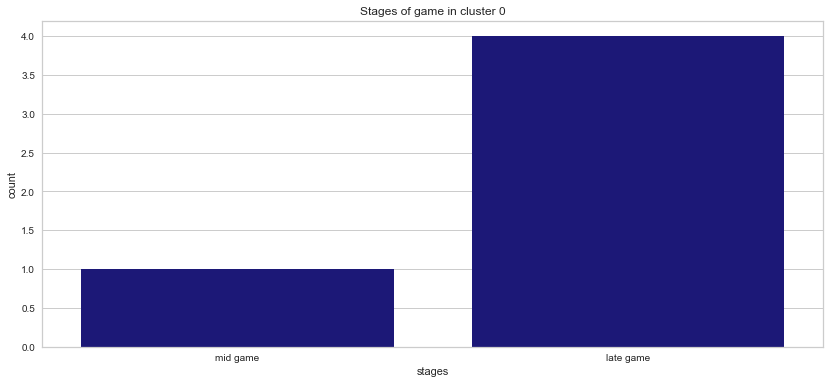

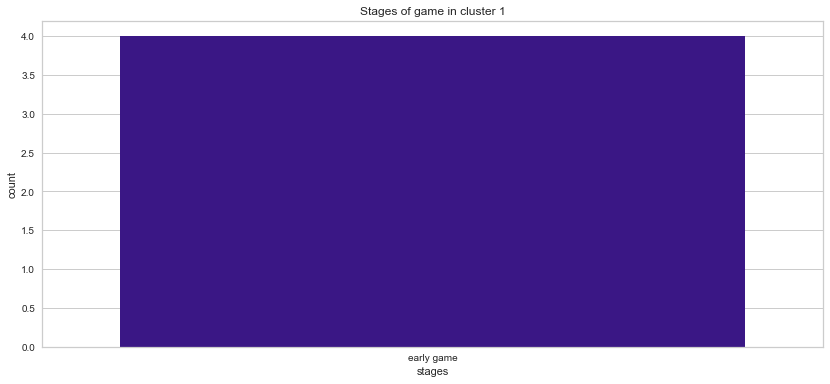

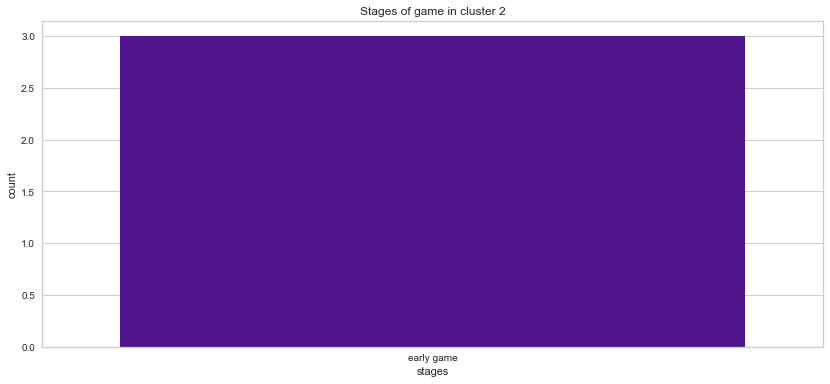

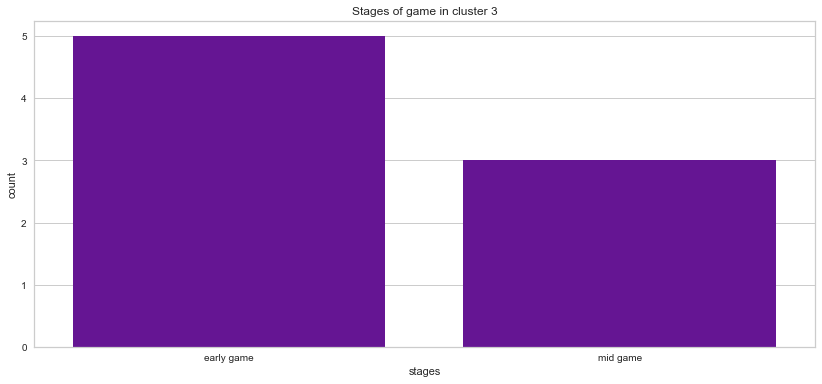

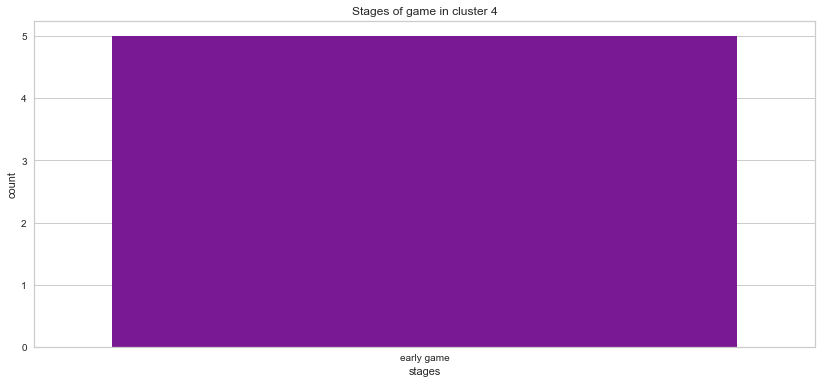

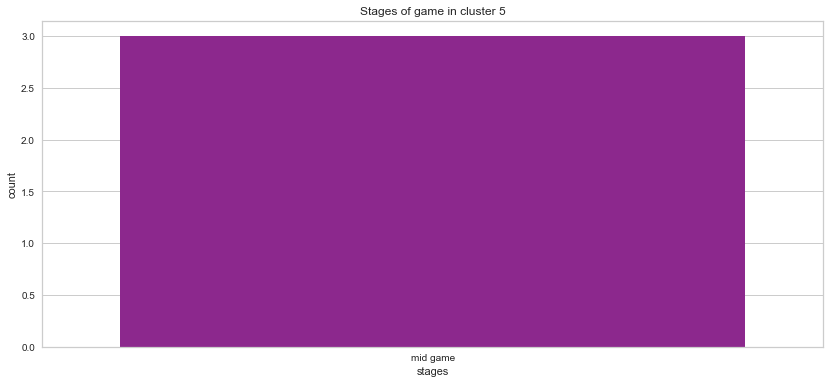

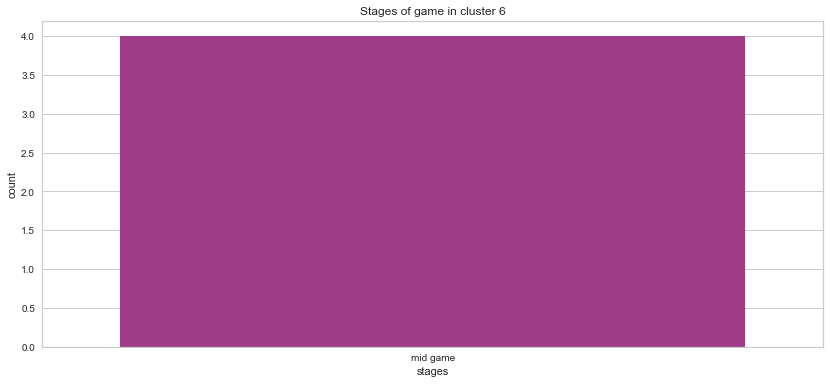

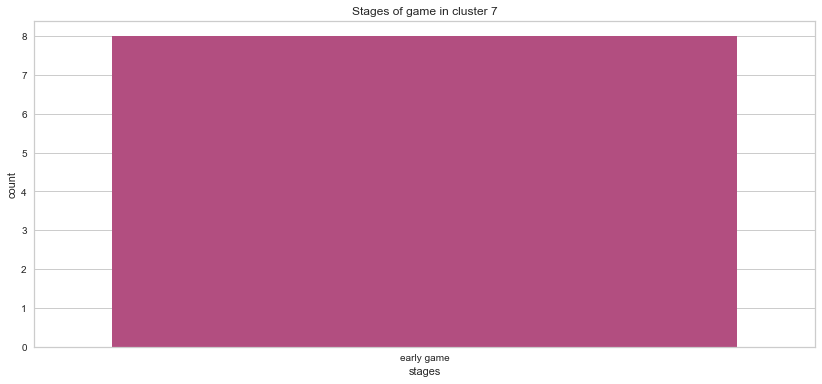

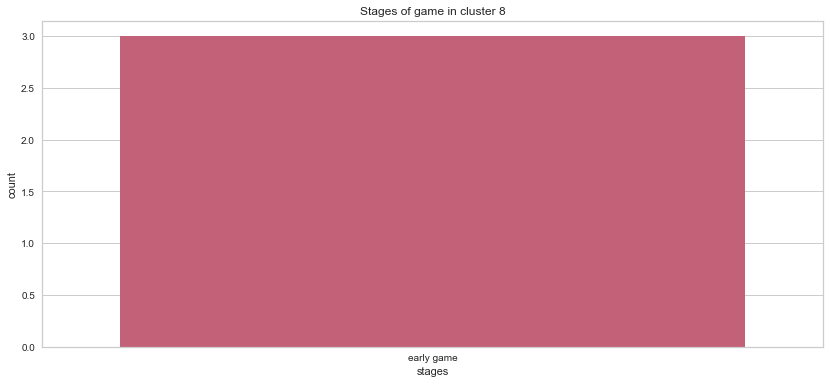

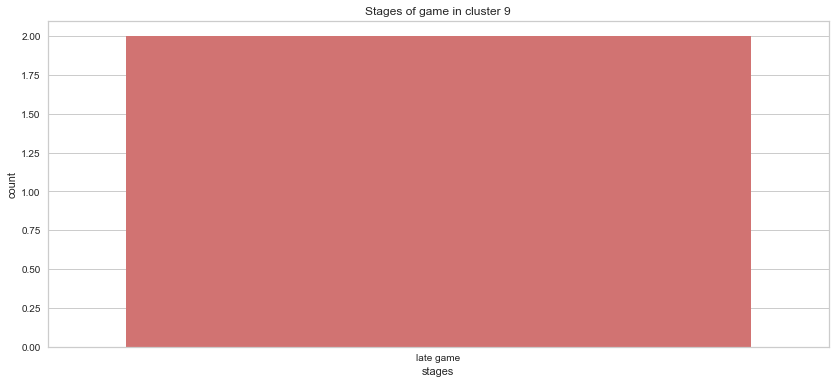

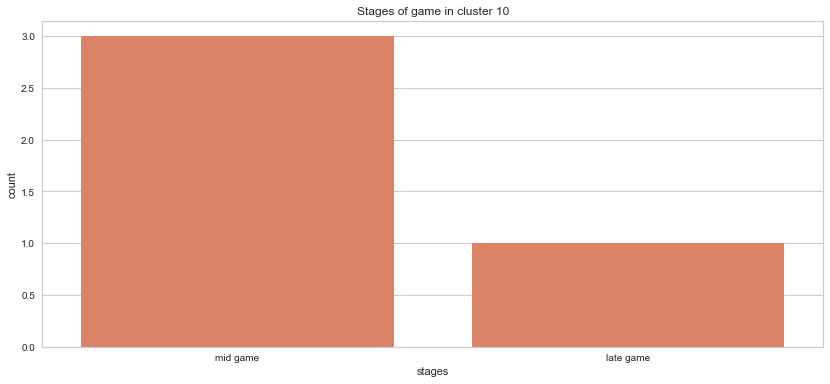

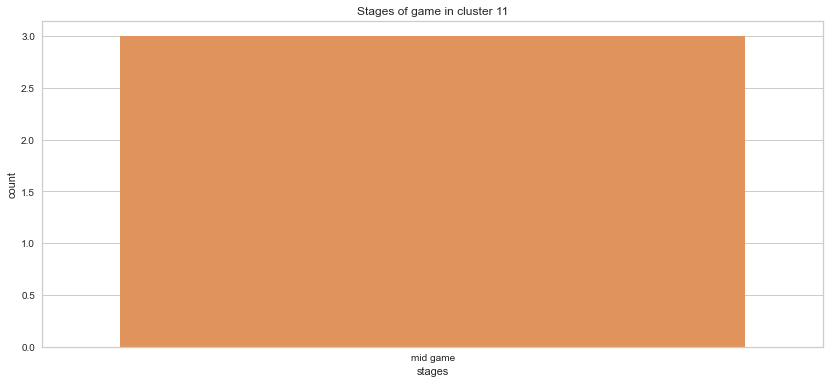

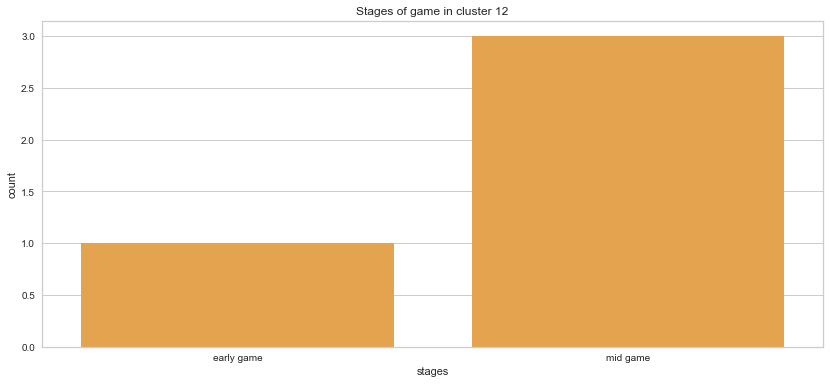

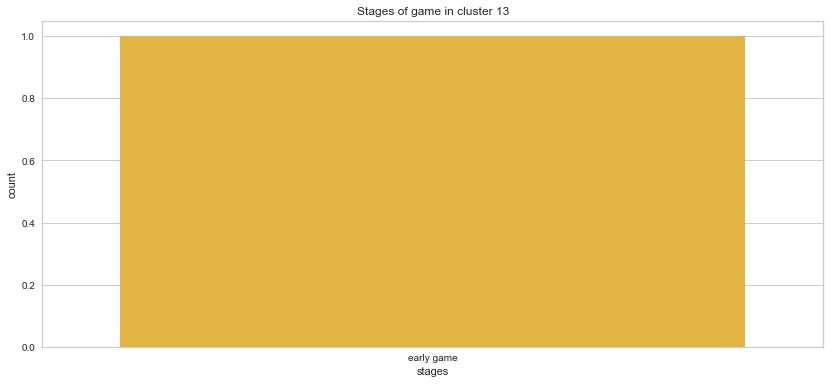

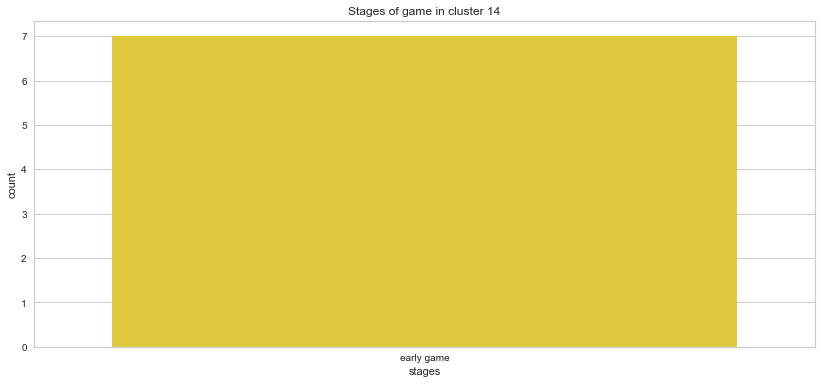

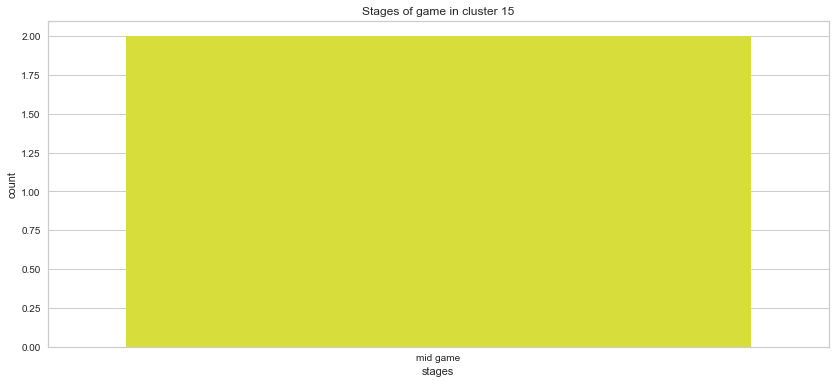

In [60]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 25

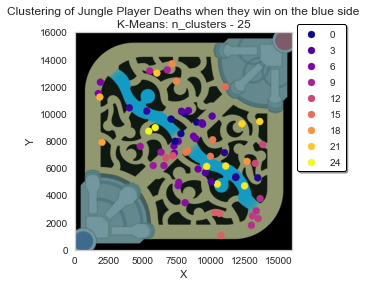

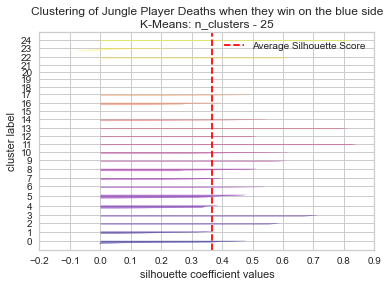

Silhouette score: 0.36642289004235856
5     6
4     5
0     5
8     4
23    4
16    4
1     4
10    3
7     3
14    3
22    2
9     2
13    2
11    2
6     2
24    2
3     2
17    2
2     2
12    2
18    1
15    1
20    1
21    1
19    1
Name: cluster, dtype: int64

Inertia: 8.367829085257684

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7876.000000,9115.400000,12.086847
1,1,12051.000000,5783.500000,9.434817
2,2,4660.500000,10324.500000,21.925933
3,3,9838.000000,5339.000000,23.581250
4,4,9027.000000,9769.600000,23.019073
5,5,8164.666667,7538.000000,4.121317
6,6,1818.500000,11917.000000,6.019250
7,7,7799.666667,4385.000000,10.677389
8,8,5882.500000,6799.000000,17.969779
9,9,6163.500000,13203.500000,17.432375


In [61]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=25, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [62]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,650.475211,748.060586,2.180958
1,1,887.858378,787.686010,0.855280
2,2,639.500000,121.500000,1.163050
3,3,219.000000,335.000000,0.915183
4,4,803.082810,415.051129,3.385546
5,5,758.380878,818.441201,1.458629
6,6,76.500000,416.000000,2.203983
7,7,229.771384,656.722671,2.788302
8,8,673.341110,618.787524,1.947519
9,9,647.500000,39.500000,0.133358


In [63]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8977.0,7098.0,10041.0,7983.0,14.295850,8.265383
1,1,13473.0,11025.0,7147.0,5298.0,10.869917,8.700367
2,2,5300.0,4021.0,10446.0,10203.0,23.088983,20.762883
3,3,10057.0,9619.0,5674.0,5004.0,24.496433,22.666067
4,4,10117.0,7865.0,10244.0,9239.0,29.532417,19.946267
5,5,9083.0,7307.0,8359.0,5944.0,6.876183,2.285050
6,6,1895.0,1742.0,12333.0,11501.0,8.223233,3.815267
7,7,8123.0,7610.0,4966.0,3467.0,13.753600,7.002783
8,8,6568.0,4828.0,7613.0,6199.0,19.658833,14.906950
9,9,6811.0,5516.0,13243.0,13164.0,17.565733,17.299017


/tmp/ipykernel_3066/474091948.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 6))


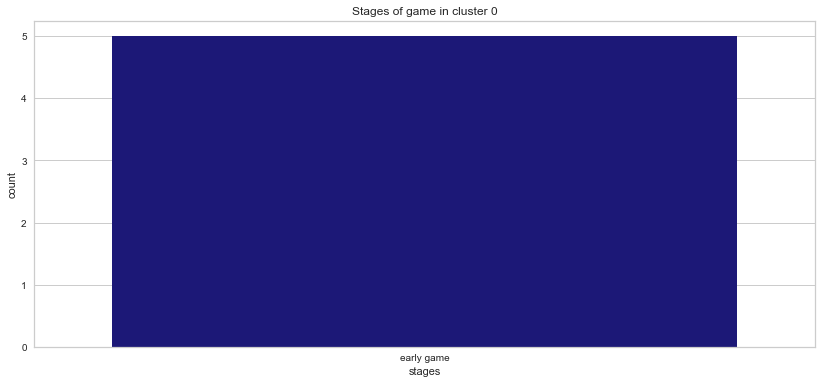

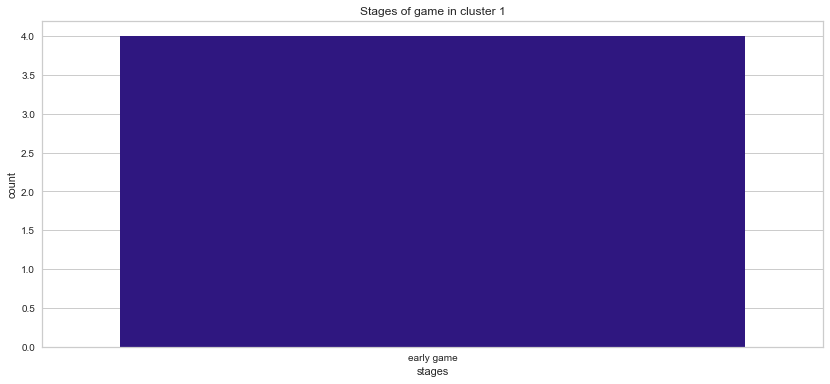

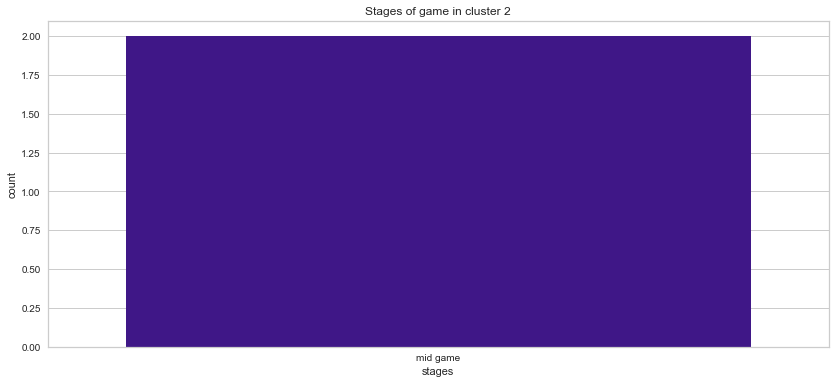

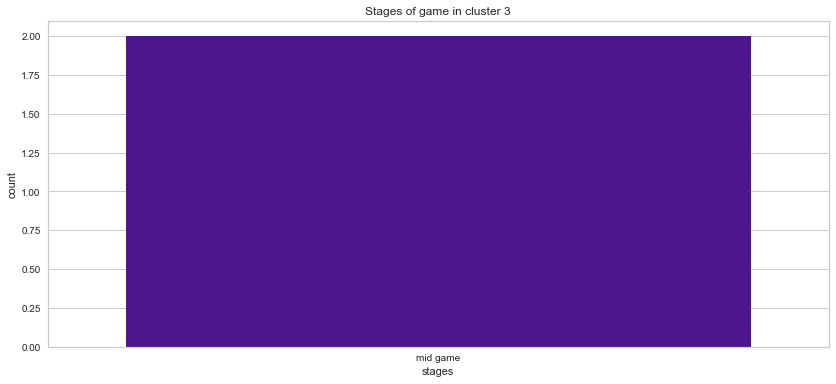

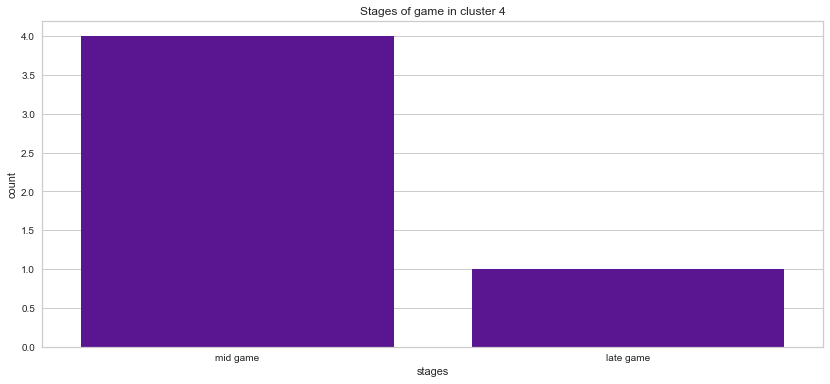

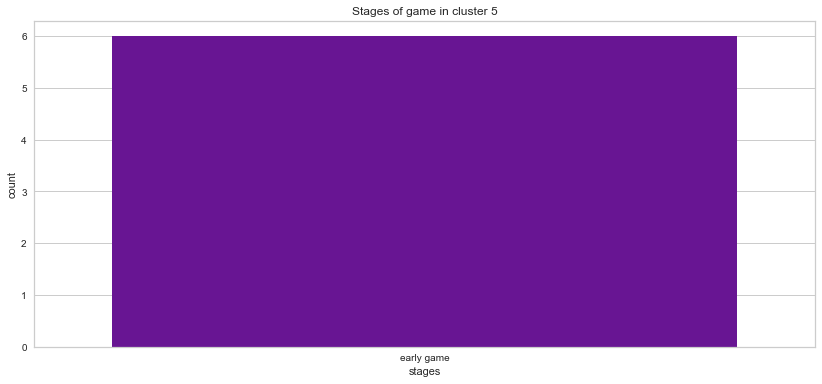

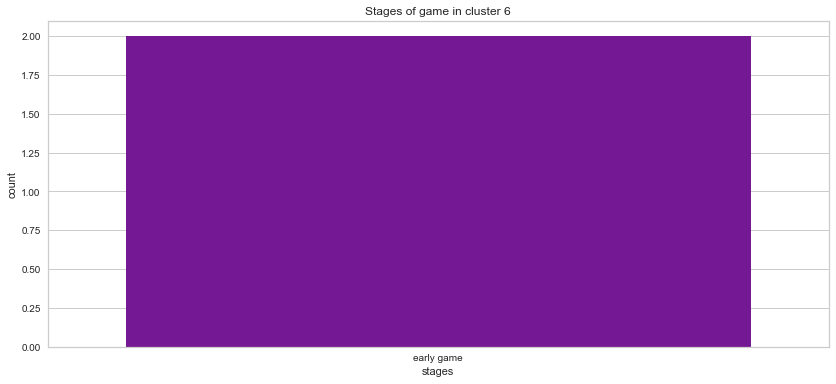

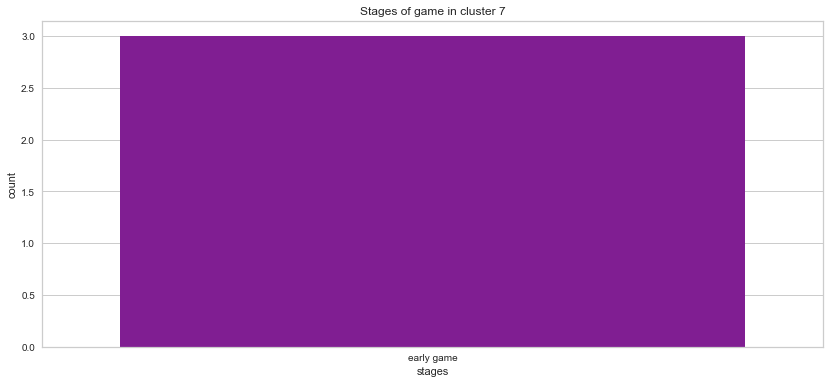

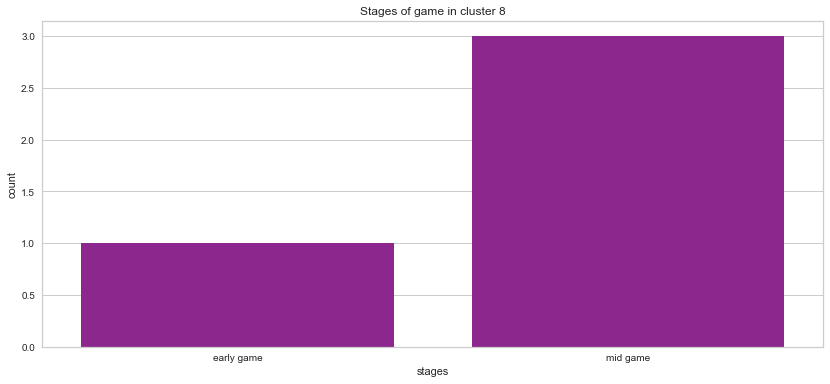

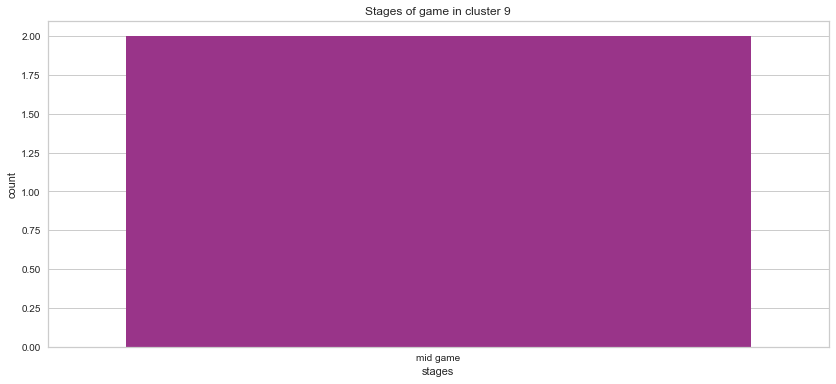

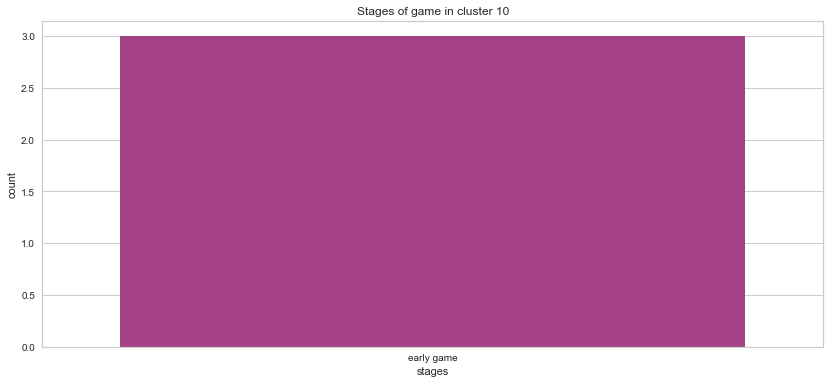

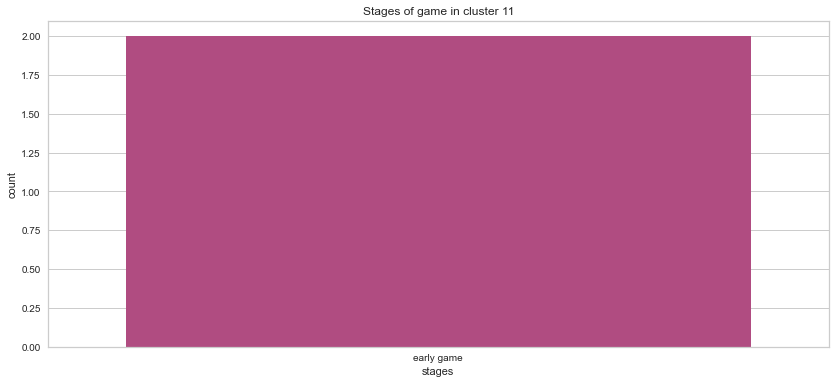

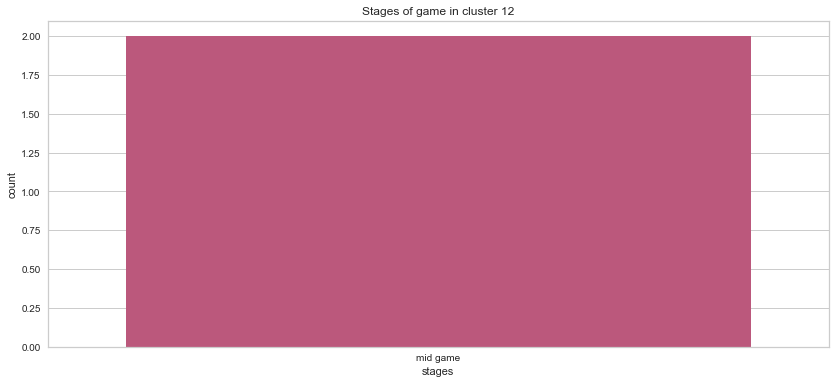

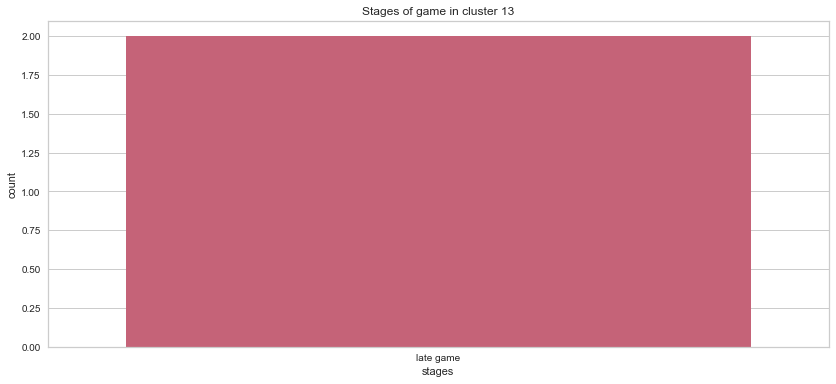

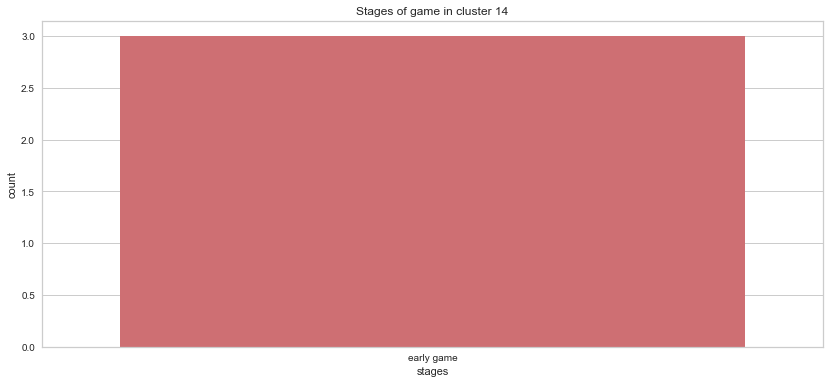

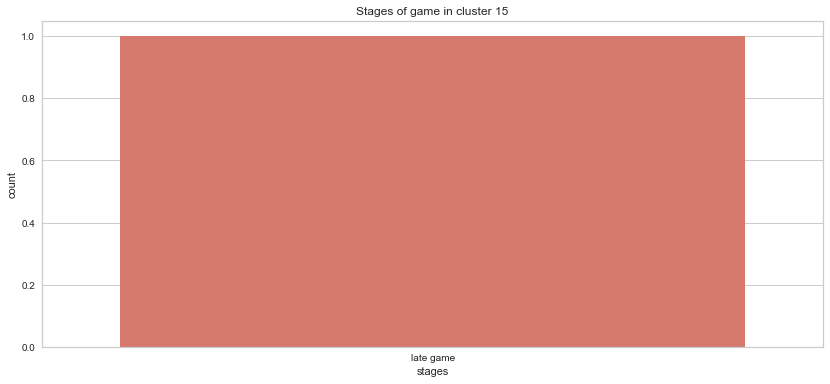

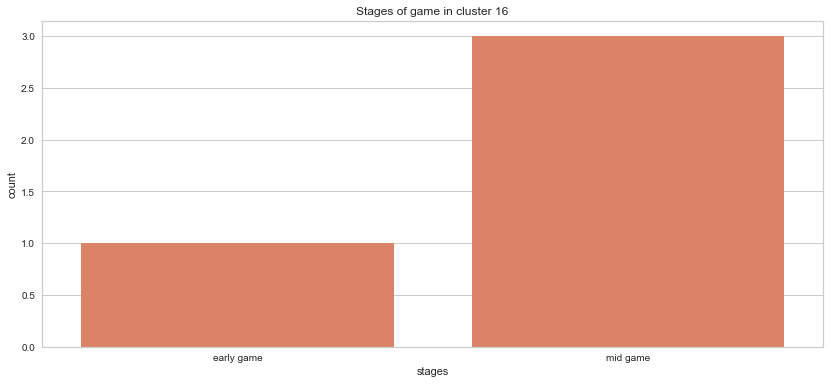

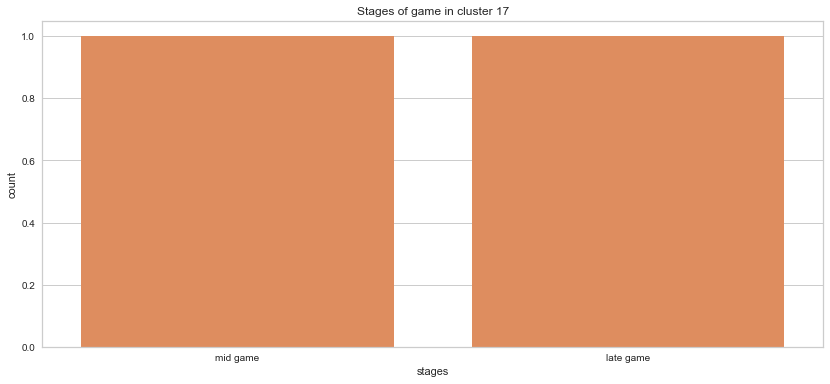

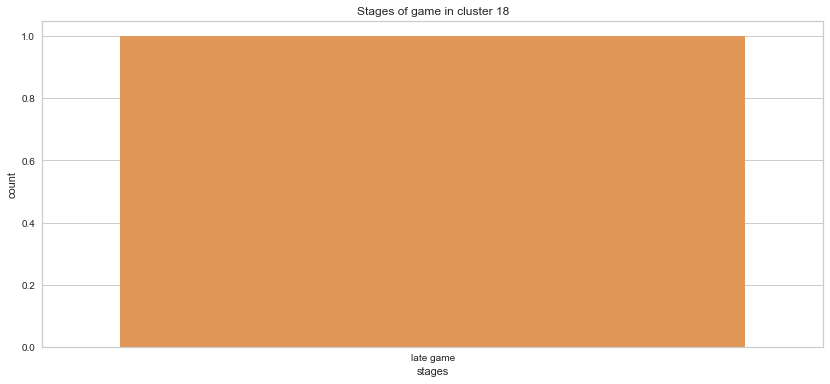

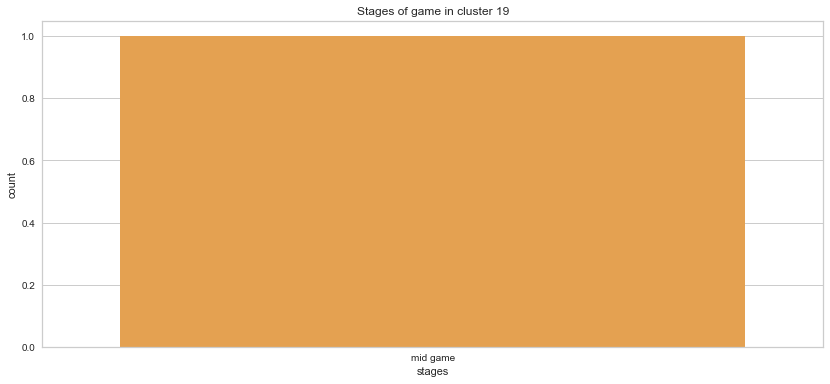

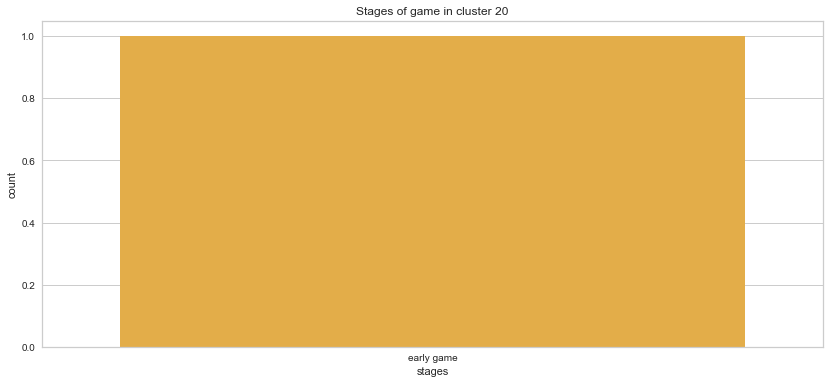

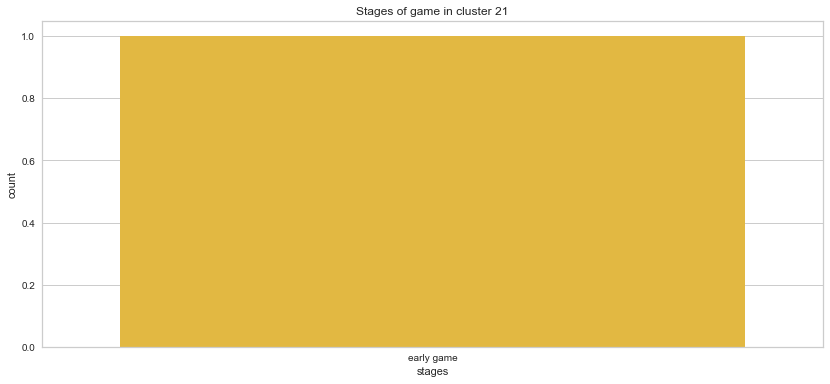

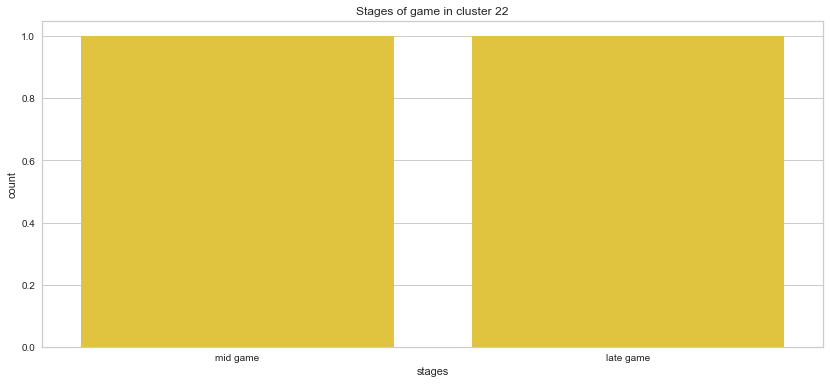

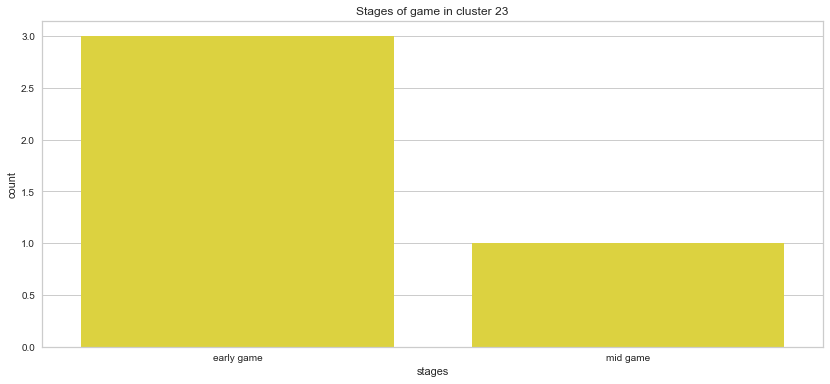

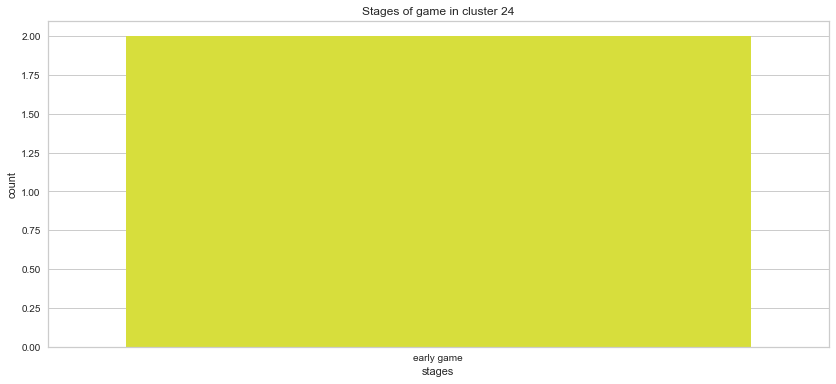

In [64]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [65]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 31")]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
9268,EUW1_6271383495,Blue,anonymous 31,euw1,Sejuani,3.031433,6264.0,8086.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120881,EUW1_6285019493,Blue,anonymous 31,euw1,Viego,14.824283,4054.0,13907.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120889,EUW1_6285019493,Blue,anonymous 31,euw1,Viego,17.816450,12303.0,3113.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120894,EUW1_6285019493,Blue,anonymous 31,euw1,Viego,19.479517,7842.0,5499.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
120898,EUW1_6285019493,Blue,anonymous 31,euw1,Viego,21.132583,6860.0,9320.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266187,EUW1_6289040932,Blue,anonymous 31,euw1,LeeSin,6.112017,7313.0,6638.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266193,EUW1_6289040932,Blue,anonymous 31,euw1,LeeSin,9.996600,11912.0,3545.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266201,EUW1_6289040932,Blue,anonymous 31,euw1,LeeSin,13.221183,3185.0,7760.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266204,EUW1_6289040932,Blue,anonymous 31,euw1,LeeSin,14.946583,9846.0,7220.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [66]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideDefeat_df["gameId"]))))

Anonymous 26 played 12 matches


In [67]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 12 matches in which the jungler died at least once
1 players died a total of 85 times on the blue side
Defeat games on blue side contains an average of 7.083333333333333 deaths per game


In [68]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
9268,6264.0,8086.0,3.031433
120881,4054.0,13907.0,14.824283
120889,12303.0,3113.0,17.816450
120894,7842.0,5499.0,19.479517
120898,6860.0,9320.0,21.132583
...,...,...,...
266187,7313.0,6638.0,6.112017
266193,11912.0,3545.0,9.996600
266201,3185.0,7760.0,13.221183
266204,9846.0,7220.0,14.946583


Normalize Data:

In [69]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[-0.26121403,  0.42022854, -1.82380335],
       [-1.00438053,  2.28704943, -0.41528303],
       [ 1.7695473 , -1.17463494, -0.05790313],
       [ 0.26942704, -0.409434  ,  0.14073106],
       [-0.06079446,  0.81597789,  0.33817086],
       [-1.27340008,  1.5080582 ,  0.67357408],
       [-0.94485996, -0.97547745,  1.14097276],
       [-0.70139727,  0.60784067, -0.82103353],
       [-0.28677088,  0.06424654, -0.0307448 ],
       [-0.649611  , -0.28660418,  0.67575383],
       [-0.80026195,  0.39745852,  0.94032603],
       [-0.1549513 , -1.69610046,  1.10157199],
       [ 0.49069562, -1.25192472,  1.90913351],
       [ 1.10406019, -0.46972645, -0.0208334 ],
       [-0.10013857,  2.00001891,  0.21838002],
       [-0.58874533,  1.18831582,  0.5629163 ],
       [-2.09491854, -0.42835557,  0.8550131 ],
       [-0.2628954 ,  0.65883269,  1.4550144 ],
       [-1.63926667, -1.88242977,  1.7789356 ],
       [ 1.96021491,  0.19445257, -0.83861886],
       [ 1.47497089,  0.07066063, -0.245

In [70]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.31649700094886707
Silhouette score for k=3: 0.31470165834034897
Silhouette score for k=4: 0.3110076184278638
Silhouette score for k=5: 0.28705200790115093
Silhouette score for k=6: 0.2805857134737146
Silhouette score for k=7: 0.28318468888349996
Silhouette score for k=8: 0.2995107852152542
Silhouette score for k=9: 0.3006308193848699
Silhouette score for k=10: 0.3098671086536803
Silhouette score for k=11: 0.29384445786616104
Silhouette score for k=12: 0.2946639421624528
Silhouette score for k=13: 0.287606735204498
Silhouette score for k=14: 0.2680079309092934
Silhouette score for k=15: 0.31126651329624033
Silhouette score for k=16: 0.29109723421573197
Silhouette score for k=17: 0.31220592506980716
Silhouette score for k=18: 0.30009325282308225
Silhouette score for k=19: 0.3042694888562814
Silhouette score for k=20: 0.27766577720714847
Silhouette score for k=25: 0.31393681825895636


K-Means with k = 3

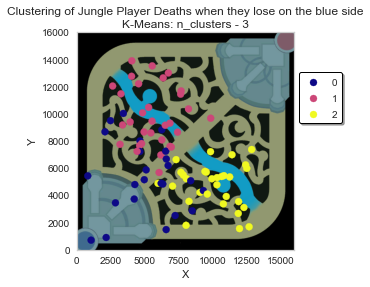

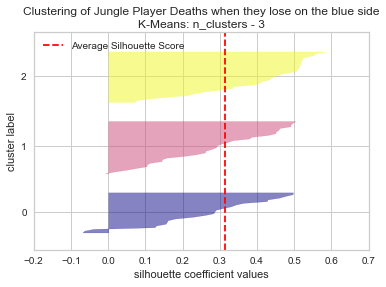

Silhouette score: 0.31470165834034897
1    31
2    30
0    24
Name: cluster, dtype: int64

Inertia: 115.53331155399098

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5061.250000,5357.958333,27.705284
1,1,5618.096774,9814.580645,15.701027
2,2,10094.533333,4769.633333,13.464904


In [71]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [72]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2300.278919,2564.879943,4.358328
1,1,1640.281080,2133.203282,6.518184
2,2,1868.402789,1551.706555,6.195900


In [73]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9318.0,811.0,10034.0,710.0,34.285483,17.067783
1,1,9858.0,2643.0,13907.0,5690.0,25.902817,1.636833
2,2,12870.0,5978.0,7382.0,1560.0,26.115850,1.622983


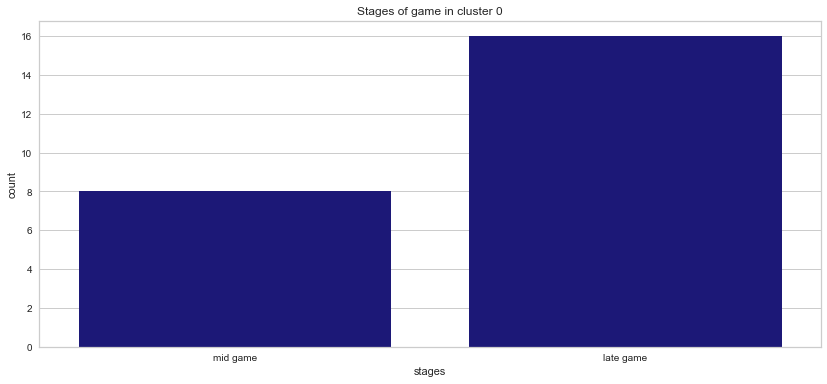

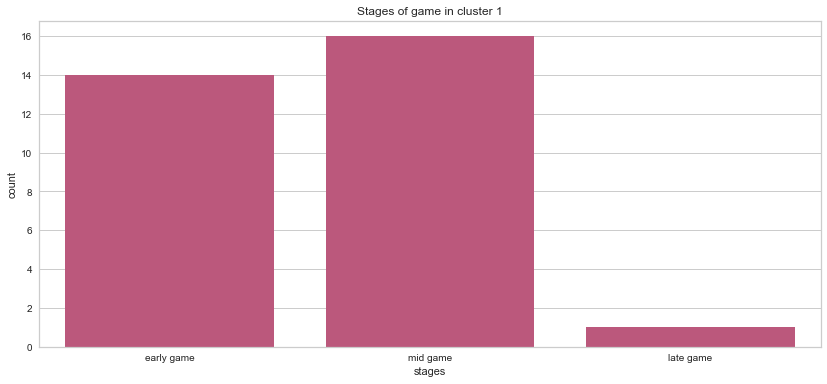

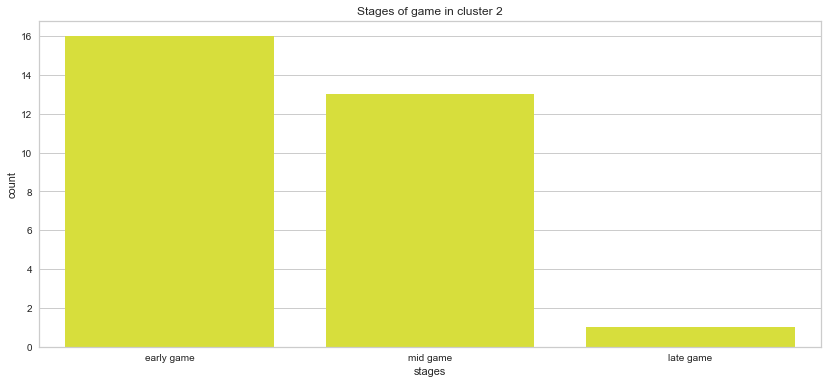

In [74]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 2

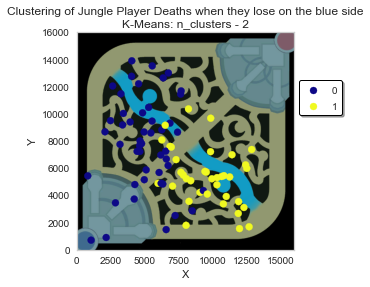

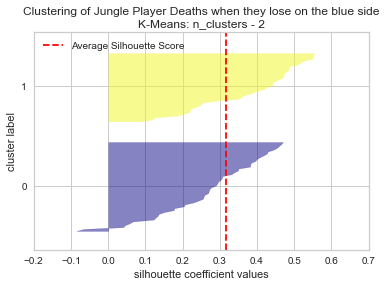

Silhouette score: 0.31649700094886707
0    48
1    37
Name: cluster, dtype: int64

Inertia: 163.6401128594594

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5053.416667,7818.604167,22.651795
1,1,9619.000000,5422.675676,12.657286


In [75]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [76]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1857.046668,3379.842839,6.855293
1,1,2017.588499,2067.593523,6.607793


In [77]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9318.0,811.0,13907.0,710.0,34.285483,8.105900
1,1,12870.0,5978.0,10366.0,1560.0,26.115850,1.622983


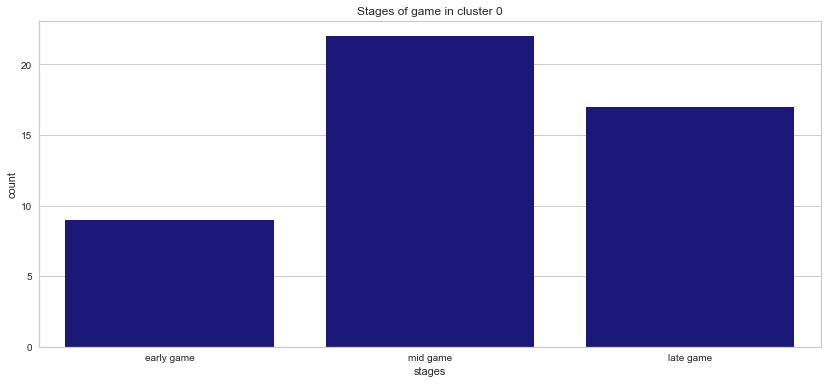

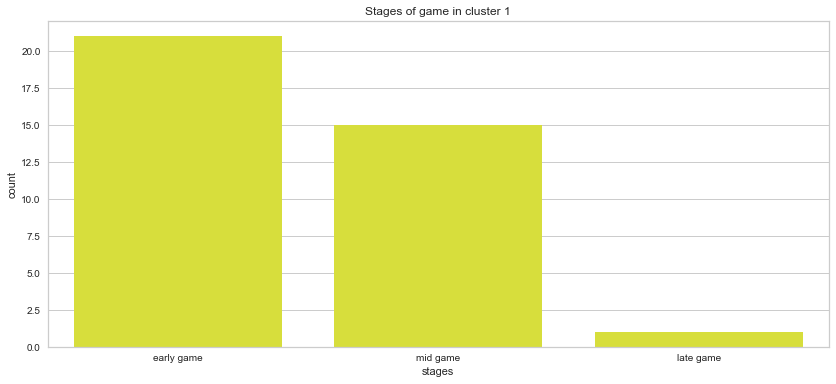

In [78]:
stagesPerCluster(blueSideDefeat_df, colors)